Test Task Autodoc by Alberto Mengual

# Instructions

The main task is to perform analysis for the __subscription commerce project__.  
  
Operational analytics is required to make a decision whether the company
is __ready to scale the business and expand the team__.  
  
Net profit from a subscription sale is 40%.  
  
The result of the analysis should be displayed with an __interactive dashboard__ that allows to track the dynamics of the following metrics:
* Dynamics of the number of purchased subscriptions by month
* Dynamics of the number of active subscriptions by month
* Revenue dynamics
* Churn rate
* LTV
* Any other metrics are encouraged



Bonus:  
- define the packages a subscription price increase is possible for. Explain the results.
- determine if there are data anomalies

__Tools__:    

Any visualization tool  

Calculations: sql, python...

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime

In [3]:
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
import matplotlib.ticker as mticker

In [5]:
%matplotlib inline

In [6]:
pd.set_option('display.max_columns', None)

# Functions

In [7]:
def cat_months(df):
    """Map and turn sale_mounth column into categorical. It allows using lineplot with ordered x-axis"""
    
    df.reset_index(inplace = True)
    
    # Map the months to strings
    df.sale_month = df.sale_month.map({12:'dec20',
                                       1:'jan21',
                                       2:'feb',
                                       3: 'mar',
                                       4 : 'apr',
                                       5 : 'may',
                                       6 : 'jun'})
    
    # Define sale_month as Categorical
    df.sale_month = pd.Categorical(df.sale_month, 
                                   categories = df.sale_month.unique(),
                                   ordered = True)

In [300]:
def q80(x):
    """Gets the quantile 0.8 in the agg function"""
    return x.quantile(0.8)

# Load Data

In [8]:
subs = pd.read_csv("data/subscription_dataset_DA_test_task.csv")

In [9]:
subs

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,4/16/2021 11:47,68373,511,purchase,month,enterprise,10.99,NaN,NaN,NaN,NaN
1,5/16/2021 12:01,68373,511,purchase,month,enterprise,10.99,NaN,NaN,NaN,NaN
2,5/4/2021 15:15,29867,515,purchase,month,smart plus,8.99,NaN,NaN,NaN,NaN
3,5/31/2021 5:24,29867,511,purchase,month,enterprise,10.99,NaN,NaN,NaN,NaN
4,3/21/2021 8:29,63044,456,purchase,year,smart,25.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
46009,4/18/2021 13:32,68182,503,cancelation,month,enterprise,10.99,NaN,NaN,NaN,NaN
46010,4/11/2021 13:49,67305,475,cancelation,trial,trial smart,0.00,NaN,NaN,NaN,NaN
46011,4/11/2021 16:33,67362,475,cancelation,trial,trial smart,0.00,NaN,NaN,NaN,NaN
46012,4/12/2021 19:29,67655,497,purchase,month,enterprise,10.99,NaN,NaN,NaN,NaN


# General info

In [10]:
subs.shape

(46014, 11)

In [11]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sale_date           46014 non-null  object 
 1   license_id          46014 non-null  int64  
 2   license_plan_id     46014 non-null  int64  
 3   operation_type      46014 non-null  object 
 4   billing_period      46014 non-null  object 
 5   license_name        46014 non-null  object 
 6   billing_plan_price  46014 non-null  float64
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          0 non-null      float64
 10  Unnamed: 10         0 non-null      float64
dtypes: float64(5), int64(2), object(4)
memory usage: 3.9+ MB


## drop the empty columns

In [12]:
subs = subs.iloc[:,0:7]
subs.shape

(46014, 7)

In [13]:
subs.describe()

,license_id,license_plan_id,billing_plan_price
count,46014.000000,46014.000000,46014.000000
mean,47753.293519,483.452514,9.543123
std,17775.312557,31.005330,6.168696
min,2971.000000,370.000000,0.000000
25%,37045.500000,451.000000,3.500000
50%,49877.500000,497.000000,10.990000
75%,60942.000000,499.000000,10.990000
max,76549.000000,605.000000,120.000000


In [14]:
subs.describe(include='object')

,sale_date,operation_type,billing_period,license_name
count,46014,46014,46014,46014
unique,23238,2,3,4
top,1/8/2021 23:01,purchase,month,enterprise
freq,101,34651,36188,22040


## datetime features

In [15]:
subs.sale_date = pd.to_datetime(subs.sale_date)

In [16]:
subs.head()

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00


In [17]:
subs.sale_date.min()

Timestamp('2020-12-13 01:00:00')

In [18]:
subs.sale_date.max()

Timestamp('2021-06-06 12:26:00')

In [19]:
subs['sale_month'] = subs.sale_date.apply(lambda x: x.month)

In [20]:
subs['sale_year'] = subs.sale_date.apply(lambda x: x.year)

In [21]:
subs.head()

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021


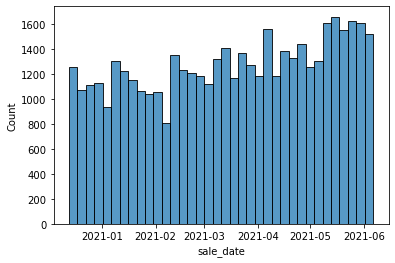

In [22]:
sns.histplot(subs.sale_date);

In [23]:
subs.dtypes

sale_date             datetime64[ns]
license_id                     int64
license_plan_id                int64
operation_type                object
billing_period                object
license_name                  object
billing_plan_price           float64
sale_month                     int64
sale_year                      int64
dtype: object

## Remove duplicates

In [24]:
index0 = subs.index
index0

RangeIndex(start=0, stop=46014, step=1)

In [25]:
subs.drop_duplicates(inplace = True, ignore_index = True)

In [26]:
subs.shape

(45988, 9)

In [27]:
# number of duplicated rows:
len(index0)-subs.shape[0]

26

# Save cleaned dataframe

In [28]:
subs.to_csv('data/subscriptions_clean.csv')

# Explore Data

In [29]:
for c in subs.columns:
    print(subs[c].nunique(), c)

23238 sale_date
21509 license_id
78 license_plan_id
2 operation_type
3 billing_period
4 license_name
17 billing_plan_price
7 sale_month
2 sale_year


In [30]:
# Check missing values
subs.isna().sum()

sale_date             0
license_id            0
license_plan_id       0
operation_type        0
billing_period        0
license_name          0
billing_plan_price    0
sale_month            0
sale_year             0
dtype: int64

## Categorical Features

In [31]:
# Explore Categorical Features

In [32]:
subs.operation_type.value_counts()

purchase       34639
cancelation    11349
Name: operation_type, dtype: int64

In [33]:
subs.billing_period.value_counts()

month    36172
year      5840
trial     3976
Name: billing_period, dtype: int64

In [34]:
subs.license_name.value_counts()

enterprise     22026
smart          11824
smart plus      8162
trial smart     3976
Name: license_name, dtype: int64

In [35]:
subs.billing_plan_price.value_counts()

10.99     19512
3.50       9261
8.99       7188
0.00       3976
25.00      2252
19.99      1964
15.99       973
18.99       399
20.00       235
12.99       137
3.99         33
4.00         26
40.00        13
120.00       11
15.00         3
8.00          3
45.00         2
Name: billing_plan_price, dtype: int64

## Date time features

In [36]:
subs.sale_year.value_counts()

2021    41466
2020     4522
Name: sale_year, dtype: int64

In [37]:
subs.sale_month[subs.sale_year == 2020].value_counts()

12    4522
Name: sale_month, dtype: int64

In [38]:
subs.sale_month.value_counts()

5     9729
4     8323
3     8110
1     7043
2     6547
12    4522
6     1714
Name: sale_month, dtype: int64

The data in months 6 and 12 are not completely meaningful as they do not consider the whole month.

## Check trial smart license

In [39]:
subs.head()

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021


In [40]:
subs.license_name.unique()

array(['enterprise', 'smart plus', 'smart', 'trial smart'], dtype=object)

In [41]:
subs[subs.license_name == 'trial smart']

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
36,2020-12-25 06:35:00,47035,475,cancelation,trial,trial smart,0.0,12,2020
42,2021-04-23 08:12:00,67596,496,cancelation,trial,trial smart,0.0,4,2021
43,2021-04-12 15:02:00,67601,475,cancelation,trial,trial smart,0.0,4,2021
60,2021-01-26 23:02:00,48972,475,cancelation,trial,trial smart,0.0,1,2021
61,2021-03-13 17:39:00,61307,475,cancelation,trial,trial smart,0.0,3,2021
...,...,...,...,...,...,...,...,...,...
45966,2021-02-06 10:10:00,54473,475,cancelation,trial,trial smart,0.0,2,2021
45970,2021-02-10 22:01:00,51105,475,cancelation,trial,trial smart,0.0,2,2021
45981,2021-04-20 22:40:00,67297,475,cancelation,trial,trial smart,0.0,4,2021
45984,2021-04-11 13:49:00,67305,475,cancelation,trial,trial smart,0.0,4,2021


In [42]:
subs[subs.license_name == 'trial smart'].operation_type.value_counts()

cancelation    3976
Name: operation_type, dtype: int64

In [43]:
subs[subs.billing_period == 'trial'].operation_type.value_counts()

cancelation    3976
Name: operation_type, dtype: int64

# Grouping

In [44]:
# Get the different purchases, revenues, packages and subscriptions

In [45]:
# for purchase and revenue purposes the trial cancelations are meaningless

revenue = subs[subs.billing_period != 'trial'].pivot_table(#values = 'billing_plan_price',
                                                               index=['sale_year',
                                                                      'sale_month',
                                                                      #'license_id',
                                                                      'license_name',
                                                                      'billing_period'],
                                                               columns = 'operation_type',
                                                               aggfunc= {'license_id':pd.Series.nunique,
                                                                         'billing_plan_price':['count',
                                                                                               'sum']}, 
                                                               fill_value = 0) #,
                                                                # margins=True)

revenue.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

revenue['freq'] = revenue.n_purch-revenue.n_cancel
revenue['revenue'] = revenue.purch_amount-revenue.cancel_amount

revenue.reset_index(inplace=True)

revenue


,sale_year,sale_month,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,2020,12,enterprise,month,388,1737,4264.12,19198.64,386,1730,1349,14934.52
1,2020,12,enterprise,year,106,331,2189.98,6523.72,106,330,225,4333.74
2,2020,12,smart,month,111,615,389.48,2197.42,110,603,504,1807.94
3,2020,12,smart,year,80,372,1695.00,8730.00,80,372,292,7035.00
4,2020,12,smart plus,month,56,45,503.44,404.55,15,43,-11,-98.89
5,2020,12,smart plus,year,13,49,207.87,887.52,5,49,36,679.65
6,2021,1,enterprise,month,684,3031,7517.16,33419.70,683,2869,2347,25902.54
7,2021,1,enterprise,year,75,347,1442.25,6843.53,75,347,272,5401.28
8,2021,1,smart,month,203,1076,711.48,3810.92,201,1013,873,3099.44
9,2021,1,smart,year,25,339,625.00,8475.00,25,339,314,7850.00


## purchases and revenues overall dynamics

In [46]:
revenue_m = subs[subs.billing_period != 'trial'].pivot_table(#values = 'billing_plan_price',
                                                               index=['sale_year',
                                                                      'sale_month'],
                                                                      #'license_id',
                                                                      #'license_name'],
                                                               columns = 'operation_type',
                                                               aggfunc= {'license_id':pd.Series.nunique,
                                                                         'billing_plan_price':['count','sum']}, 
                                                               fill_value = 0) #,
                                                                # margins=True)

revenue_m.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

revenue_m['freq'] = revenue_m.n_purch-revenue_m.n_cancel
revenue_m['revenue'] = revenue_m.purch_amount-revenue_m.cancel_amount

# revenue_m.reset_index(inplace=True)

revenue_m

n_cancel  n_purch  cancel_amount  purch_amount  \
sale_year sale_month                                                   
2020      12               754     3149        9249.89      37941.85   
2021      1               1043     5002       10981.33      55016.06   
          2               1007     4775       11370.16      51763.50   
          3               1286     6208       14436.17      65796.00   
          4               1456     6305       15660.39      62381.18   
          5               1577     7785       16068.00      72896.75   
          6                250     1415        2365.99      12953.17   

                      cancel_cust  purch_cust  freq   revenue  
sale_year sale_month                                           
2020      12                  695        3118  2395  28691.96  
2021      1                  1018        4750  3959  44034.73  
          2                   968        4727  3768  40393.34  
          3                  1242        6029  4922  51359.83  
          4                  1387        6184  4849  46720.79  
          5                  1558        7625  6208  56828.75  
          6                   249        1410  1165  10587.18

In [47]:
trial_m = subs[subs.billing_period == 'trial'].pivot_table(values= 'billing_plan_price',
                                                           index = ['sale_year',
                                                                    'sale_month'],
                                                           # columns = 'billing_plan_price',
                                                           aggfunc = 'count')

trial_m

billing_plan_price
sale_year sale_month                    
2020      12                         619
2021      1                          998
          2                          765
          3                          616
          4                          562
          5                          367
          6                           49

## purchases and revenues dynamics by billing period

In [48]:
revenue_b_m = subs[subs.billing_period != 'trial'].pivot_table(#values = 'billing_plan_price',
                                                               index=['sale_year',
                                                                      'sale_month',
                                                                      'billing_period'],
                                                                      #'license_id',
                                                                      #'license_name'],
                                                               columns = 'operation_type',
                                                               aggfunc= {'license_id':pd.Series.nunique,
                                                                         'billing_plan_price':['count','sum']}, 
                                                               fill_value = 0) #,
                                                                # margins=True)

revenue_b_m.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

revenue_b_m['freq'] = revenue_b_m.n_purch-revenue_b_m.n_cancel
revenue_b_m['revenue'] = revenue_b_m.purch_amount-revenue_b_m.cancel_amount

revenue_b_m.reset_index('billing_period', inplace=True)
#revenue_b_m.set_index('sale_month', inplace=True) # 'billing_period', 

revenue_b_m

billing_period  n_cancel  n_purch  cancel_amount  \
sale_year sale_month                                                    
2020      12                  month       555     2397        5157.04   
          12                   year       199      752        4092.85   
2021      1                   month       917     4232        8498.34   
          1                    year       126      770        2482.99   
          2                   month       832     4023        7715.44   
          2                    year       175      752        3654.72   
          3                   month      1049     5257        9434.78   
          3                    year       237      951        5001.39   
          4                   month      1222     5613       10735.99   
          4                    year       234      692        4924.40   
          5                   month      1387     7143       11966.14   
          5                    year       190      642        4101.86   
          6                   month       235     1310        2057.09   
          6                    year        15      105         308.90   

                      purch_amount  cancel_cust  purch_cust  freq   revenue  
sale_year sale_month                                                         
2020      12              21800.61          508        2369  1842  16643.57  
          12              16141.24          190         751   553  12048.39  
2021      1               38354.37          907        3992  3315  29856.03  
          1               16661.69          116         765   644  14178.70  
          2               35450.33          814        3986  3191  27734.89  
          2               16313.17          162         748   577  12658.45  
          3               45507.37         1028        5109  4208  36072.59  
          3               20288.63          221         936   714  15287.24  
          4               47530.14         1190        5548  4391  36794.15  
          4               14851.04          205         651   458   9926.64  
          5               59413.34         1381        6990  5756  47447.20  
          5               13483.41          179         641   452   9381.55  
          6               10773.82          234        1306  1075   8716.73  
          6                2179.35           15         105    90   1870.45

## purchases and revenue dynamics by license_name

In [49]:
revenue_l_m = subs[subs.billing_period != 'trial'].pivot_table(#values = 'billing_plan_price',
                                                               index=['sale_year',
                                                                      'sale_month',
                                                                      #'license_id',
                                                                      'license_name'],
                                                               columns = 'operation_type',
                                                               aggfunc= {'license_id':pd.Series.nunique,
                                                                         'billing_plan_price':['count','sum']}, 
                                                               fill_value = 0) #,
                                                                # margins=True)

revenue_l_m.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

revenue_l_m['freq'] = revenue_l_m.n_purch-revenue_l_m.n_cancel
revenue_l_m['revenue'] = revenue_l_m.purch_amount-revenue_l_m.cancel_amount

revenue_l_m.reset_index(inplace=True)

revenue_l_m

,sale_year,sale_month,license_name,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,2020,12,enterprise,494,2068,6454.10,25722.36,492,2059,1574,19268.26
1,2020,12,smart,191,987,2084.48,10927.42,190,974,796,8842.94
2,2020,12,smart plus,69,94,711.31,1292.07,17,92,25,580.76
3,2021,1,enterprise,759,3378,8959.41,40263.23,758,3210,2619,31303.82
4,2021,1,smart,228,1415,1336.48,12285.92,226,1352,1187,10949.44
5,2021,1,smart plus,56,209,685.44,2466.91,39,201,153,1781.47
6,2021,2,enterprise,695,2742,8633.05,32412.59,686,2735,2047,23779.54
7,2021,2,smart,224,1432,1826.99,12953.92,215,1419,1208,11126.93
8,2021,2,smart plus,88,601,910.12,6396.99,78,594,513,5486.87
9,2021,3,enterprise,753,3192,9470.47,38299.09,747,3125,2439,28828.62


In [50]:
# Map the months to strings
revenue_l_m.sale_month = revenue_l_m.sale_month.map({12:'dec20',
                 1:'jan21',
                 2:'feb',
                 3: 'mar',
                 4 : 'apr',
                 5 : 'may',
                 6 : 'jun'})

In [51]:
# Set Ordered Categorical

revenue_l_m.sale_month = pd.Categorical(revenue_l_m.sale_month, 
                                        categories = revenue_l_m.sale_month.unique(),
                                        ordered = True)
revenue_l_m.sale_month


0     dec20
1     dec20
2     dec20
3     jan21
4     jan21
5     jan21
6       feb
7       feb
8       feb
9       mar
10      mar
11      mar
12      apr
13      apr
14      apr
15      may
16      may
17      may
18      jun
19      jun
20      jun
Name: sale_month, dtype: category
Categories (7, object): ['dec20' < 'jan21' < 'feb' < 'mar' < 'apr' < 'may' < 'jun']

## Save revenue

In [52]:
revenue.to_csv('data/revenue.csv')

# Purchased subscriptions by month

## Operation Type

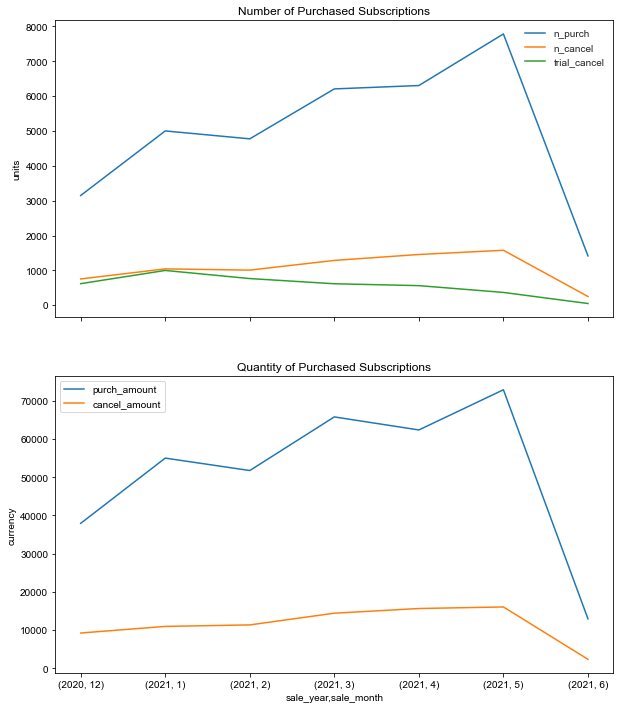

In [53]:
f,ax = plt.subplots(2,1,figsize= (10,12), sharex = True)

revenue_m[['n_purch', 'n_cancel']].plot(#figsize= (10,7), 
                                        title = 'Number of Purchased Subscriptions', 
                                        ylabel = 'units', 
                                        ax = ax[0])
revenue_m[['purch_amount', 'cancel_amount']].plot(#figsize= (10,4), 
                                                  title = 'Quantity of Purchased Subscriptions', 
                                                  ylabel = 'currency', 
                                                  ax = ax[1])

ax[0].plot(trial_m.billing_plan_price.to_list(), label = 'trial_cancel')

plt.style.use('seaborn')
xTicks = ax[1].get_xticklabels()

ax[0].legend()
    
plt.show()



# code testing:

# ax[0].bar_label(ax[0].containers[0], label_type='edge')
# print(ax.containers)

#for bars in ax.containers:
#    ax.bar_label(bars, label_type='edge')

# ax.xaxis.set_major_locator(mticker.FixedLocator(revenue_m.sale_month.to_list()))
# ax.set_xticklabels(['dec','jan','feb','mar','apr','may','jun'])


### xTicks

In [121]:
#xTicks = [ x.get_text() for x in xTicks]
#xTicks

['(2021, 1)', '(2021, 2)', '(2021, 3)', '(2021, 4)', '(2021, 5)']

In [122]:
# xTicks.insert(0,'(2020,12)')
# xTicks.append('(2021, 6)')
# xTicks

['(2020,12)',
 '(2021, 1)',
 '(2021, 2)',
 '(2021, 3)',
 '(2021, 4)',
 '(2021, 5)',
 '(2021, 6)']

## Operation Type - Billing Period

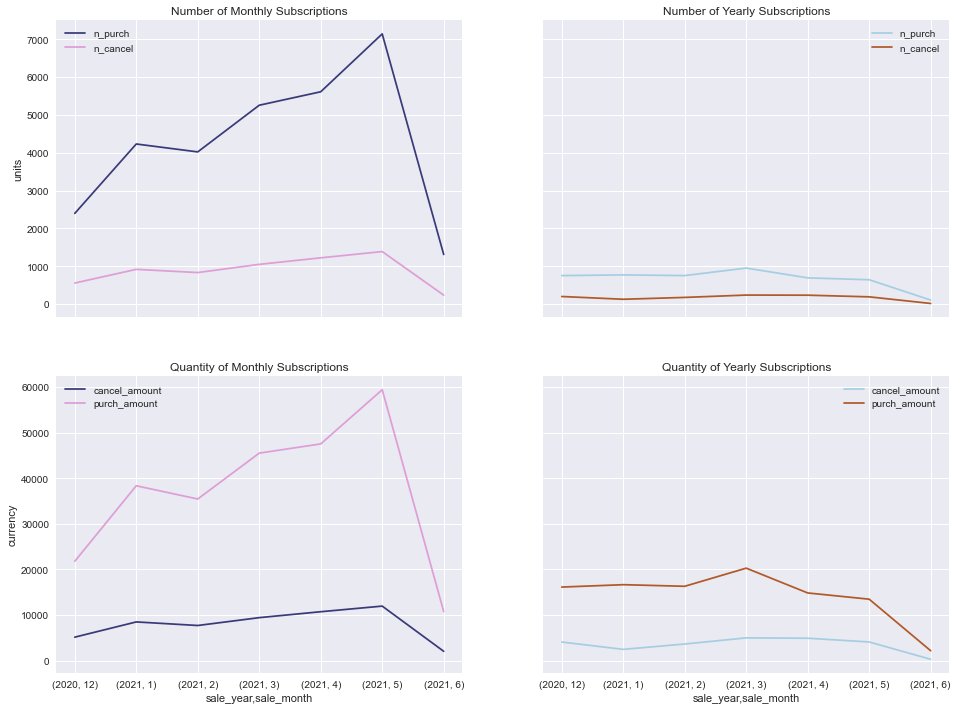

In [54]:
f,ax = plt.subplots(2,2,figsize= (16,12), sharex = 'col', sharey = 'row')

# revenue_b_m[['cancel_amount', 'purch_amount']][revenue_b_m.billing_period == 'month'].plot(ax=ax,
#                                                                                           legend = 'reverse')

revenue_b_m[revenue_b_m.billing_period == 'month'].plot(y = ['n_purch', 'n_cancel'],
                                                        ax=ax[0,0],
                                                        #legend = 'reverse',
                                                        colormap = 'tab20b',
                                                        ylabel = 'units',
                                                        #ylim = (0,65000),
                                                        title = 'Number of Monthly Subscriptions')

revenue_b_m[['n_purch', 'n_cancel']][revenue_b_m.billing_period == 'year'].plot(ax=ax[0,1],
                                                                                          #legend = 'reverse',
                                                                                          colormap = 'Paired',
                                                                                          #ylim = (0,65000),
                                                                                          title = 'Number of Yearly Subscriptions')

revenue_b_m[revenue_b_m.billing_period == 'month'].plot(y = ['cancel_amount', 'purch_amount'],
                                                        ax=ax[1,0],
                                                        #legend = 'reverse',
                                                        colormap = 'tab20b',
                                                        ylabel = 'currency',
                                                        #ylim = (0,65000),
                                                        title = 'Quantity of Monthly Subscriptions')

revenue_b_m[['cancel_amount', 'purch_amount']][revenue_b_m.billing_period == 'year'].plot(ax=ax[1,1],
                                                                                          #legend = 'reverse',
                                                                                          colormap = 'Paired',
                                                                                          #ylim = (0,65000),
                                                                                          title = 'Quantity of Yearly Subscriptions')

#xTicks = ax[0].get_xticklabels()
#ax[1].set_yticklabels([])

plt.show()

In [55]:
xTicks

[Text(-1.0, 0, '(2021, 6)'),
 Text(0.0, 0, '(2020, 12)'),
 Text(1.0, 0, '(2021, 1)'),
 Text(2.0, 0, '(2021, 2)'),
 Text(3.0, 0, '(2021, 3)'),
 Text(4.0, 0, '(2021, 4)'),
 Text(5.0, 0, '(2021, 5)'),
 Text(6.0, 0, '(2021, 6)'),
 Text(7.0, 0, '')]

In [56]:
xTicks[0].get_text()

'(2021, 6)'

In [57]:
#xTicks = list(map(lambda x: x.get_text(), xTicks))
#xTicks

In [58]:
xTicks = xTicks[1:-1]
xTicks

[Text(0.0, 0, '(2020, 12)'),
 Text(1.0, 0, '(2021, 1)'),
 Text(2.0, 0, '(2021, 2)'),
 Text(3.0, 0, '(2021, 3)'),
 Text(4.0, 0, '(2021, 4)'),
 Text(5.0, 0, '(2021, 5)'),
 Text(6.0, 0, '(2021, 6)')]

## License Name

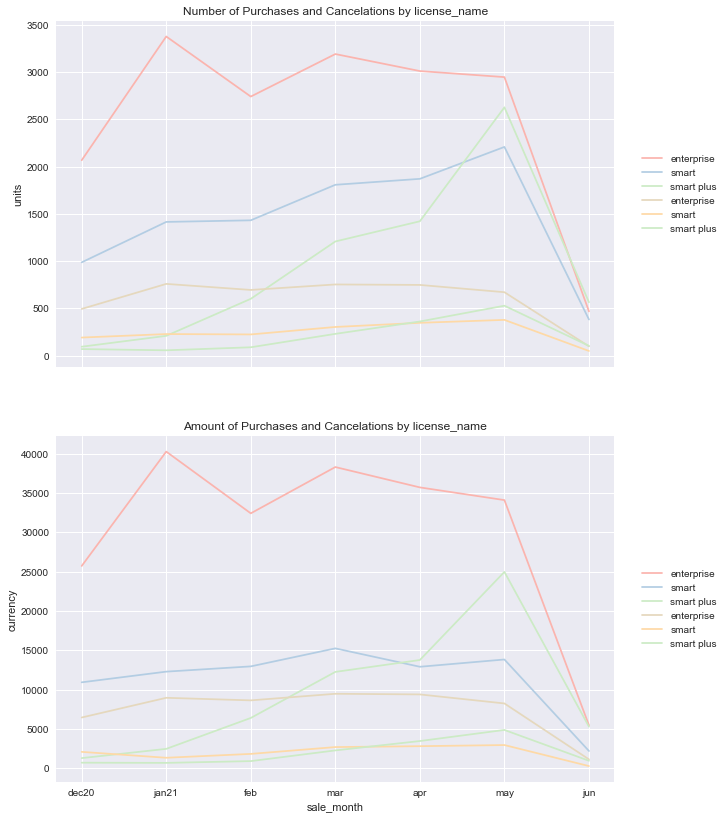

In [59]:
f,ax = plt.subplots(2,1, figsize= (10,14), sharex = 'col') #, sharey = 'row')
# f,ax = plt.subplots(figsize= (10,7)) #, sharex = 'col', sharey = 'row')
#f,ax = plt.subplots(2,2,figsize= (16,12), sharex = 'col', sharey = 'row')

plt.style.use('seaborn-notebook')


sns.lineplot(x = 'sale_month', y= 'n_purch', hue = 'license_name',
             data=revenue_l_m, 
             ax=ax[0],
             palette = 'Pastel1') 

sns.lineplot(x = 'sale_month', y= 'n_cancel', hue = 'license_name',
             data=revenue_l_m, 
             ax=ax[0],
             palette = 'Pastel1_r',
             legend = True) 


sns.lineplot(x = 'sale_month', y= 'purch_amount', hue = 'license_name',
             data=revenue_l_m, 
             ax=ax[1],
             palette = 'Pastel1') 

sns.lineplot(x = 'sale_month', y= 'cancel_amount', hue = 'license_name',
             data=revenue_l_m, 
             ax=ax[1],
             palette = 'Pastel1_r',
             legend = True) 


ax[0].legend(loc = 'center right', bbox_to_anchor = (1.2,0.5))
ax[1].legend(loc = 'center right', bbox_to_anchor = (1.2,0.5))

ax[0].set_title('Number of Purchases and Cancelations by license_name')
ax[1].set_title('Amount of Purchases and Cancelations by license_name')

ax[0].set_ylabel('units')
ax[1].set_ylabel('currency')

plt.show()

It seems there was a discount or reduction in the prices in may for the smart license. Even though the number of purchases increases the amount remains the same.  
It is interesting the increase of sales in the smart plus license that brings an increase in incomes.


There is an __anomalie__:  

In may the number of smart plus licenses increases the number of smart licences.

# Active Subscriptions

In [60]:
# There are no requirements defined for the Active Subscriptions

I consider two different approaches:
1. Active subscriptions is the addition of active year subscriptions and new month subscriptions
    + Just analyzed grouped by months
2. Active subscriptions are the licenses the purchase in a month
    + Grouped by license_name, billing period and months


## active year packages approach - cumsum

Considers the active subscriptions as the packages active yearly in addition to the new active monthly packages

Assumptions:
* Exclude trial cancelations from active subscriptions
* Monthly subscriptions must be renewed every month, unlike yearly subscriptions that remain active

In [99]:
active_y = subs[subs.billing_period != 'trial'].pivot_table(index=['sale_year','sale_month'],
                                                           columns= ['billing_period','operation_type'],
                                                           values = 'billing_plan_price',
                                                           aggfunc = 'count')

active_y.columns=['month_cancel','month_purch', 'year_cancel', 'year_purch']

# active_y.reset_index(inplace=True)

active_y

month_cancel  month_purch  year_cancel  year_purch
sale_year sale_month                                                    
2020      12                   555         2397          199         752
2021      1                    917         4232          126         770
          2                    832         4023          175         752
          3                   1049         5257          237         951
          4                   1222         5613          234         692
          5                   1387         7143          190         642
          6                    235         1310           15         105

In [62]:
# Compute Monthly Active Users
# As the addition of the still active year subscriptions and the new month subscriptions


In [100]:
active_y['year_new'] = active_y.year_purch-active_y.year_cancel
active_y['year_active'] = active_y.year_new.cumsum()
active_y['month_new'] = active_y.month_purch-active_y.month_cancel
# Monthly Active Users
active_y['mau'] = active_y.year_active+active_y.month_new

active_y

month_cancel  month_purch  year_cancel  year_purch  \
sale_year sale_month                                                       
2020      12                   555         2397          199         752   
2021      1                    917         4232          126         770   
          2                    832         4023          175         752   
          3                   1049         5257          237         951   
          4                   1222         5613          234         692   
          5                   1387         7143          190         642   
          6                    235         1310           15         105   

                      year_new  year_active  month_new   mau  
sale_year sale_month                                          
2020      12               553          553       1842  2395  
2021      1                644         1197       3315  4512  
          2                577         1774       3191  4965  
          3                714         2488       4208  6696  
          4                458         2946       4391  7337  
          5                452         3398       5756  9154  
          6                 90         3488       1075  4563

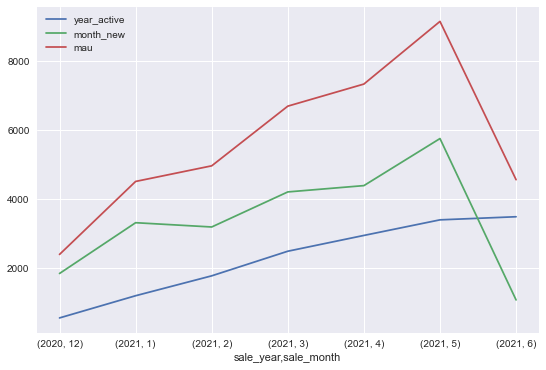

In [101]:
active_y[['year_active','month_new', 'mau']].plot(figsize=(9,6));

## Save active

In [65]:
#active.to_csv('data/active_subscriptions.csv')
active2.to_csv('data/active_subscriptions.csv')

## Purchase Approach - not accurate?

Considers the active subscriptions as the subscriptions actively buying during the current month.  
Assumptions:
* Active subscriptions is the subtraction of licenses that cancel from licenses that purchase

In [66]:
# Already computed in grouping - revenue: cancel_cust and purch_cust

In [67]:
revenue

,sale_year,sale_month,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,2020,12,enterprise,month,388,1737,4264.12,19198.64,386,1730,1349,14934.52
1,2020,12,enterprise,year,106,331,2189.98,6523.72,106,330,225,4333.74
2,2020,12,smart,month,111,615,389.48,2197.42,110,603,504,1807.94
3,2020,12,smart,year,80,372,1695.00,8730.00,80,372,292,7035.00
4,2020,12,smart plus,month,56,45,503.44,404.55,15,43,-11,-98.89
5,2020,12,smart plus,year,13,49,207.87,887.52,5,49,36,679.65
6,2021,1,enterprise,month,684,3031,7517.16,33419.70,683,2869,2347,25902.54
7,2021,1,enterprise,year,75,347,1442.25,6843.53,75,347,272,5401.28
8,2021,1,smart,month,203,1076,711.48,3810.92,201,1013,873,3099.44
9,2021,1,smart,year,25,339,625.00,8475.00,25,339,314,7850.00


In [68]:
active = subs[subs.license_name != 'trial smart'].pivot_table(index=['sale_year','sale_month'],
                                                              columns= ['operation_type'],
                                                              values = 'license_id',
                                                              aggfunc = pd.Series.nunique)
active.columns=['cancel_cust','purch_cust']
active.reset_index(inplace=True)
active

,sale_year,sale_month,cancel_cust,purch_cust
0,2020,12,695,3118
1,2021,1,1018,4750
2,2021,2,968,4727
3,2021,3,1242,6029
4,2021,4,1387,6184
5,2021,5,1558,7625
6,2021,6,249,1410


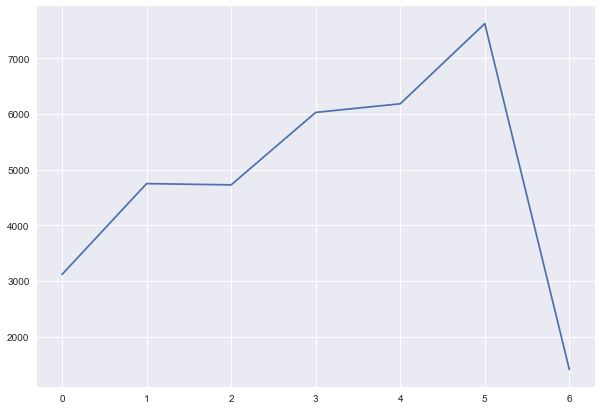

In [69]:
active.purch_cust.plot(figsize=(10,7)); 

### by License Name

In [70]:
revenue_l_m.head()

,sale_year,sale_month,license_name,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,2020,dec20,enterprise,494,2068,6454.10,25722.36,492,2059,1574,19268.26
1,2020,dec20,smart,191,987,2084.48,10927.42,190,974,796,8842.94
2,2020,dec20,smart plus,69,94,711.31,1292.07,17,92,25,580.76
3,2021,jan21,enterprise,759,3378,8959.41,40263.23,758,3210,2619,31303.82
4,2021,jan21,smart,228,1415,1336.48,12285.92,226,1352,1187,10949.44


In [71]:
active_l_m = subs.pivot_table(index=['sale_year','sale_month'],
                              columns= ['license_name','operation_type'],
                              values = 'license_id',
                              aggfunc = pd.Series.nunique)

# [subs.billing_period != 'trial']
"""
active_l_m.columns=['enterprise_cancel', 'enterprise_purch', 
                    'smart_cancel', 'smart_purch',
                    'sPlus_cancel', 'sPlus_purch', 
                    'trial_cancel']
"""
# active_l_m.reset_index(drop=True, inplace= True)

active_l_m

license_name          enterprise                smart           smart plus  \
operation_type       cancelation purchase cancelation purchase cancelation   
sale_year sale_month                                                         
2020      12                 492     2059         190      974          17   
2021      1                  758     3210         226     1352          39   
          2                  686     2735         215     1419          78   
          3                  747     3125         291     1755         211   
          4                  736     2994         333     1841         333   
          5                  659     2901         375     2170         527   
          6                   98      468          49      381         103   

license_name                  trial smart  
operation_type       purchase cancelation  
sale_year sale_month                       
2020      12               92         619  
2021      1               201         997  
          2               594         765  
          3              1162         616  
          4              1368         562  
          5              2592         362  
          6               563          47

The trial subscriptions do not show purchase but just cancelation

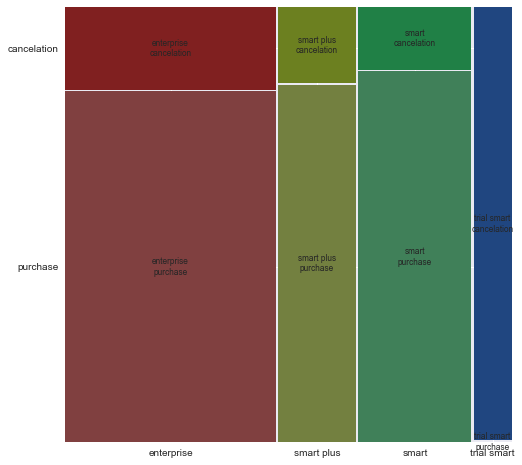

In [72]:
# Plot the general frequency of packages by license and operation type
f, ax = plt.subplots(figsize=(8,8))
mosaic(subs, ['license_name','operation_type'], ax = ax)
plt.show()

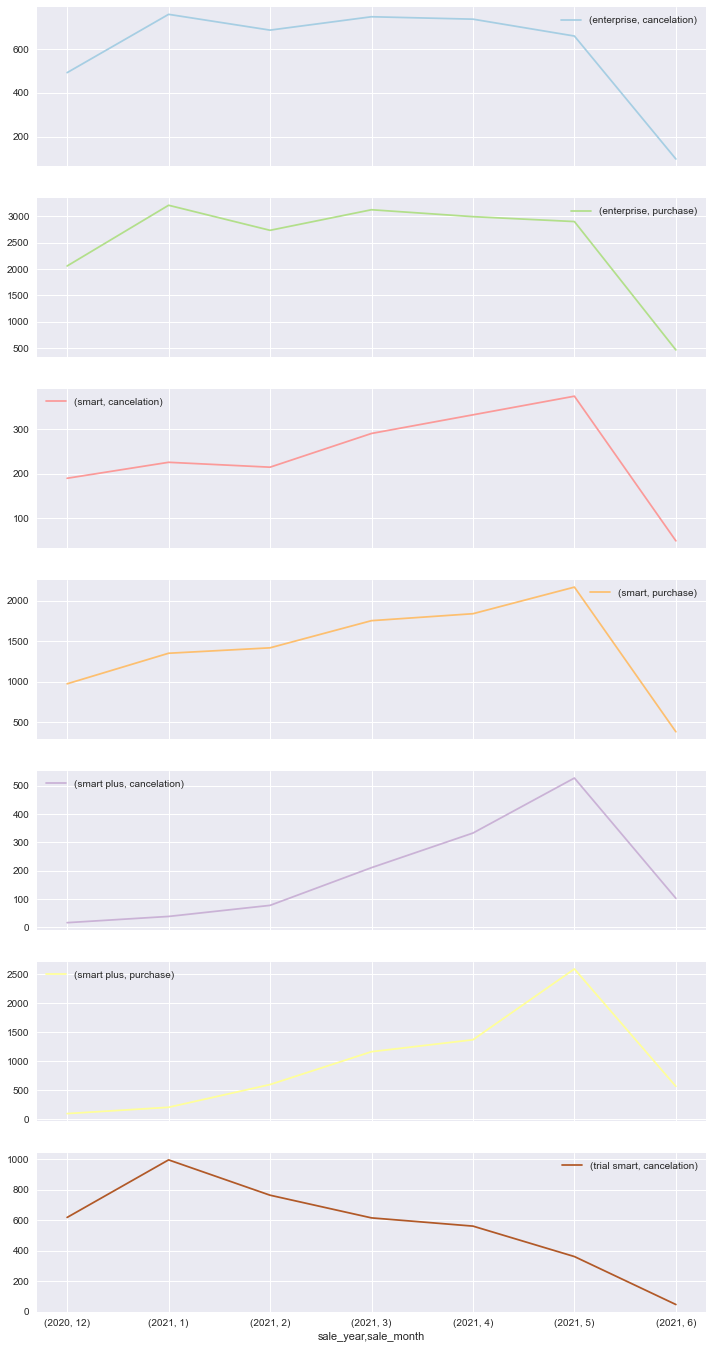

In [73]:
active_l_m.plot(subplots = True, figsize=(12,24), colormap = 'Paired'); 

The amount of trial cancelations is decresing.  
The number of smart plus subscriptions is increasing highly (as well as cancelations).  
Smart subscriptions increases slowly and constantly.  


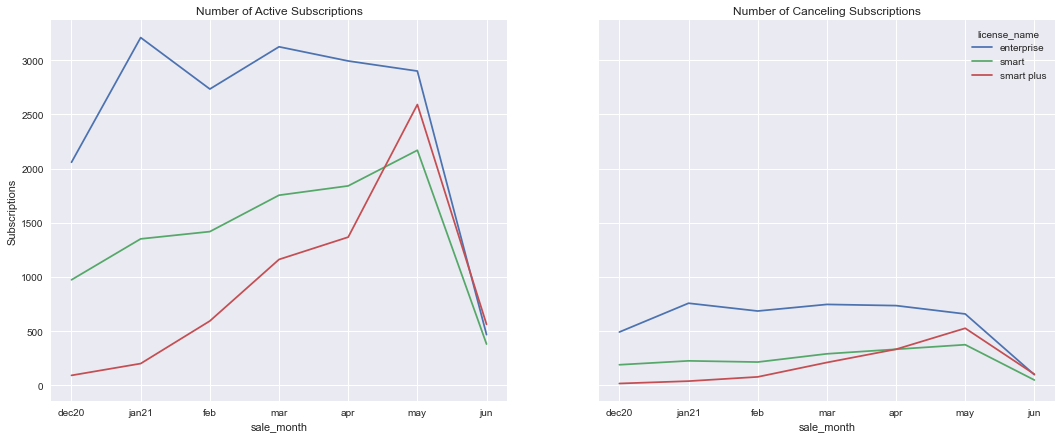

In [74]:
f,ax = plt.subplots(1,2, figsize= (18,7), sharey = 'row') # , sharex = 'col') 
#f,ax = plt.subplots(figsize= (10,7)) #, sharex = 'col', sharey = 'row')

plt.style.use('seaborn-notebook')


sns.lineplot(x = 'sale_month', y= 'purch_cust', hue = 'license_name',
             data=revenue_l_m, 
             ax=ax[0],
             legend = False)
             #palette = 'Pastel1') 

sns.lineplot(x = 'sale_month', y= 'cancel_cust', hue = 'license_name',
             data=revenue_l_m, 
             ax=ax[1],
             #palette = 'Pastel1_r',
             legend = True) 



#ax[0].legend(loc = 'center right', bbox_to_anchor = (1.2,0.5))
#ax[1].legend(loc = 'center right', bbox_to_anchor = (1.2,0.5))

ax[0].set_title('Number of Active Subscriptions')
ax[1].set_title('Number of Canceling Subscriptions')

ax[0].set_ylabel('Subscriptions')
#ax[1].set_ylabel('currency')

plt.show()

### by license name and Billing Period

In [75]:
# Already computed un revenue (regarding Purchase Approach)

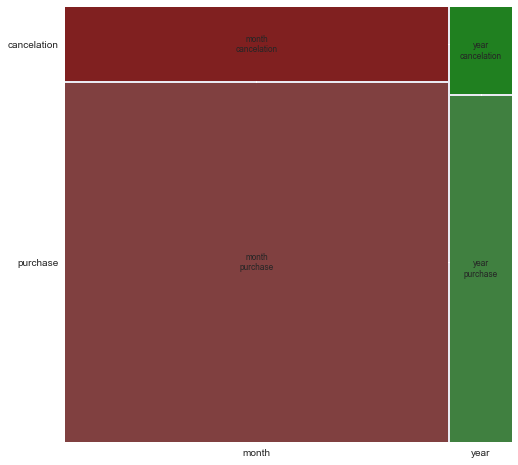

In [76]:
# General frequency distributions of packages by license and operation type
f, ax = plt.subplots(figsize=(8,8))
mosaic(subs[subs.billing_period != 'trial'], ['billing_period','operation_type'], ax = ax)
plt.show()

In [77]:
# Prepare DataFrame for the plots
cat_months(revenue_b_m)
cat_months(revenue)

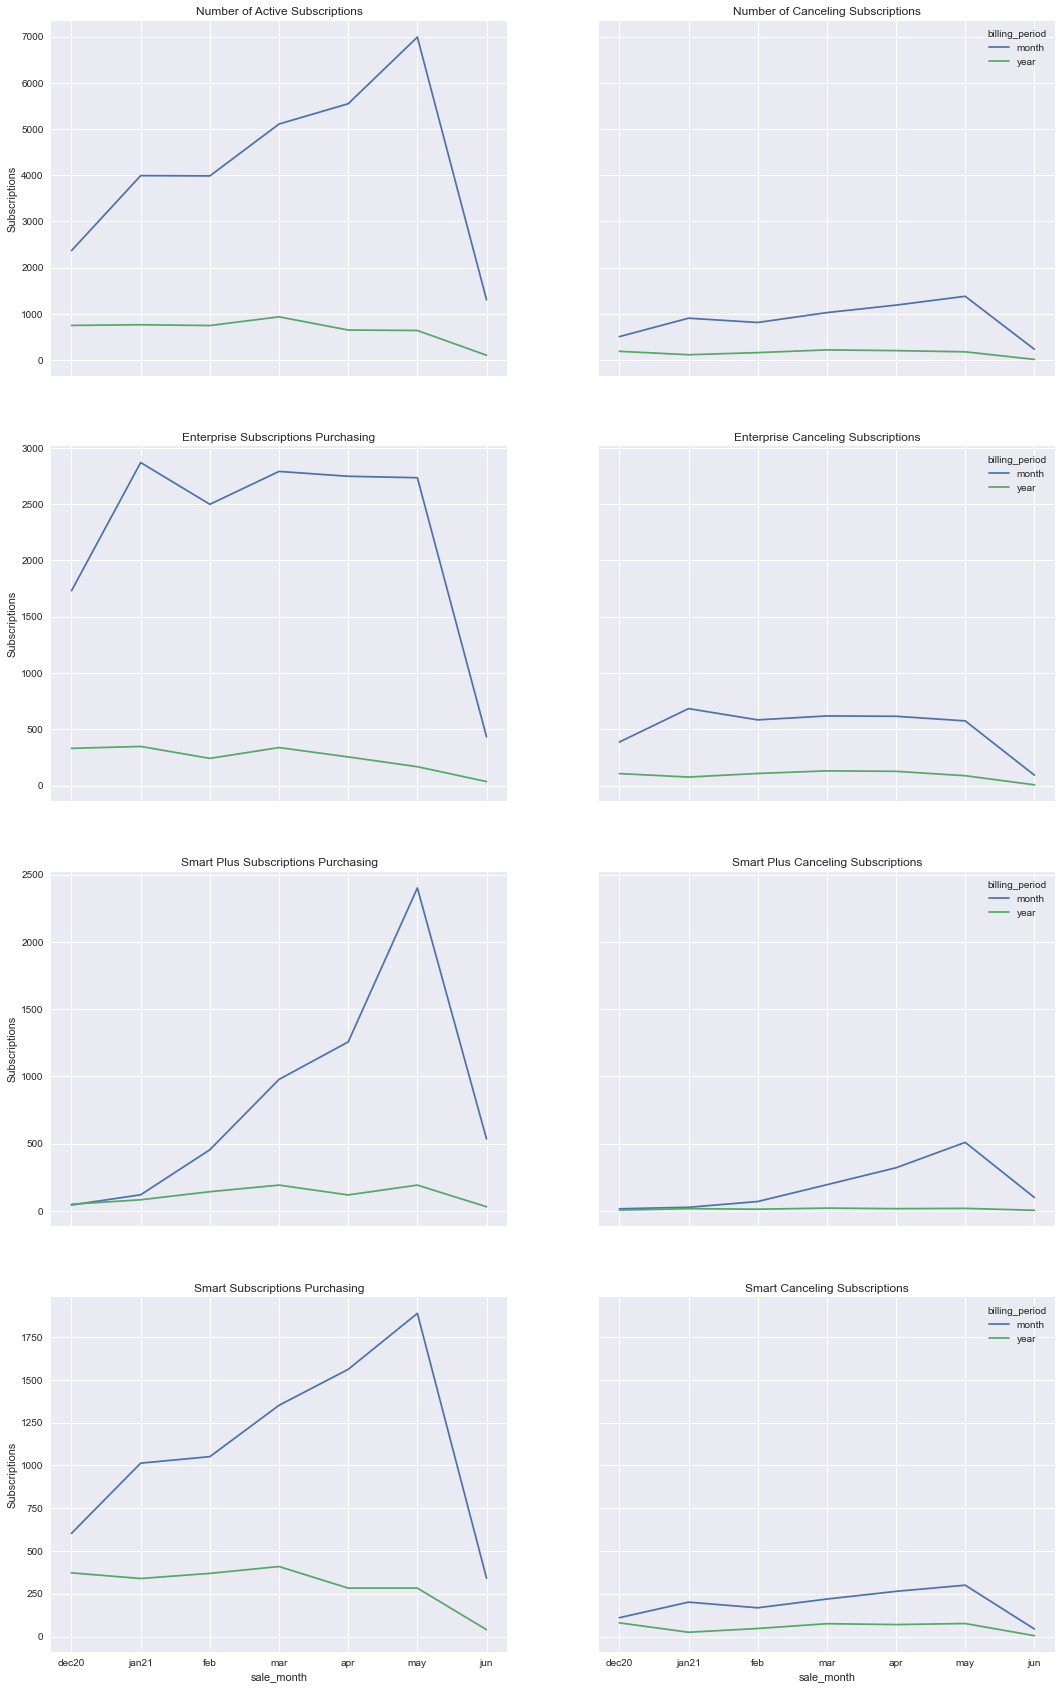

In [78]:
f,ax = plt.subplots(4,2, figsize= (18,30), sharey = 'row', sharex = 'col') 
#f,ax = plt.subplots(figsize= (10,7)) #, sharex = 'col', sharey = 'row')

plt.style.use('seaborn-notebook')


sns.lineplot(x = 'sale_month', y= 'purch_cust', hue = 'billing_period',
             data=revenue_b_m, 
             ax=ax[0,0],
             legend = False)
             #palette = 'Pastel1') 

sns.lineplot(x = 'sale_month', y= 'cancel_cust', hue = 'billing_period',
             data=revenue_b_m, 
             ax=ax[0,1],
             #palette = 'Pastel1_r',
             legend = True) 


sns.lineplot(x = 'sale_month', y= 'purch_cust', hue = 'billing_period',
             data=revenue[revenue.license_name == 'enterprise'], 
             ax=ax[1,0],
             legend = False)
             #palette = 'Pastel1') 

sns.lineplot(x = 'sale_month', y= 'cancel_cust', hue = 'billing_period',
             data=revenue[revenue.license_name == 'enterprise'], 
             ax=ax[1,1],
             #palette = 'Pastel1_r',
             legend = True) 


sns.lineplot(x = 'sale_month', y= 'purch_cust', hue = 'billing_period',
             data=revenue[revenue.license_name == 'smart plus'], 
             ax=ax[2,0],
             legend = False)
             #palette = 'Pastel1') 

sns.lineplot(x = 'sale_month', y= 'cancel_cust', hue = 'billing_period',
             data=revenue[revenue.license_name == 'smart plus'], 
             ax=ax[2,1],
             #palette = 'Pastel1_r',
             legend = True) 


sns.lineplot(x = 'sale_month', y= 'purch_cust', hue = 'billing_period',
             data=revenue[revenue.license_name == 'smart'], 
             ax=ax[3,0],
             legend = False)
             #palette = 'Pastel1') 

sns.lineplot(x = 'sale_month', y= 'cancel_cust', hue = 'billing_period',
             data=revenue[revenue.license_name == 'smart'], 
             ax=ax[3,1],
             #palette = 'Pastel1_r',
             legend = True) 


#ax[0].legend(loc = 'center right', bbox_to_anchor = (1.2,0.5))
#ax[1].legend(loc = 'center right', bbox_to_anchor = (1.2,0.5))

ax[0,0].set_title('Number of Active Subscriptions')
ax[0,1].set_title('Number of Canceling Subscriptions')
ax[1,0].set_title('Enterprise Subscriptions Purchasing')
ax[1,1].set_title('Enterprise Canceling Subscriptions')
ax[2,0].set_title('Smart Plus Subscriptions Purchasing')
ax[2,1].set_title('Smart Plus Canceling Subscriptions')
ax[3,0].set_title('Smart Subscriptions Purchasing')
ax[3,1].set_title('Smart Canceling Subscriptions')


for i in range(4):
    ax[i,0].set_ylabel('Subscriptions')
#ax[1].set_ylabel('currency')

plt.show()

Probable __anomaly__:  

In february the monthly active subscriptions fall for enterprise and smart licenses.  
There are no yearly cancelations for smart plus.

# Revenue dynamics

In [79]:
# It is already computed in revenue y plotted in Purchase

In [80]:
# It is strange the profit is constant for all the packages and its different prices
# Net profit from a subscription is 40%

In [81]:
# Prepare the dataframe
cat_months(revenue_m)

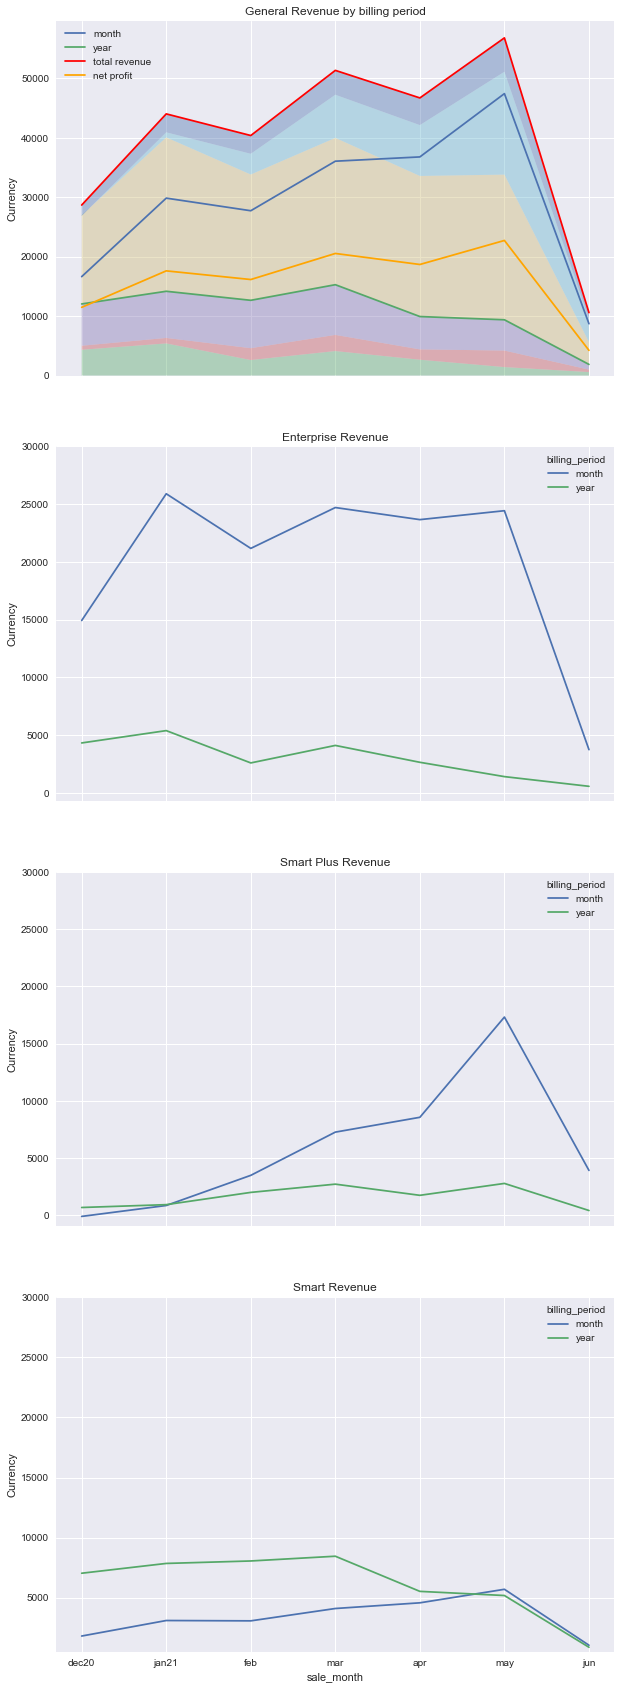

In [96]:
f,ax = plt.subplots(4,1, figsize= (10,30), sharex = 'col') # sharey = 'row', 
# f,ax = plt.subplots(4,2, figsize= (18,30), sharey = 'row', sharex = 'col') 
#f,ax = plt.subplots(figsize= (10,7)) #, sharex = 'col', sharey = 'row')

plt.style.use('seaborn-notebook')


sns.lineplot(x = 'sale_month', y= 'revenue', hue = 'billing_period',
             data=revenue_b_m, 
             ax=ax[0],
             legend = True)
             

ax[0].plot(revenue_m.revenue, color = 'orange', label = 'total revenue') 
ax[0].plot(revenue_m.revenue*0.4, color = 'r', label = 'net profit') 

ax[0].stackplot(revenue.sale_month[(revenue.license_name == 'enterprise') & (revenue.billing_period == 'year')], 
                revenue.revenue[(revenue.license_name == 'enterprise') & (revenue.billing_period == 'year')],
                revenue.revenue[(revenue.license_name == 'smart plus') & (revenue.billing_period == 'year')],
                revenue.revenue[(revenue.license_name == 'smart') & (revenue.billing_period == 'year')],
                revenue.revenue[(revenue.license_name == 'enterprise') & (revenue.billing_period == 'month')],
                revenue.revenue[(revenue.license_name == 'smart plus') & (revenue.billing_period == 'month')],
                revenue.revenue[(revenue.license_name == 'smart') & (revenue.billing_period == 'month')],
                alpha = 0.4) #, colors = 'Accent')
             


sns.lineplot(x = 'sale_month', y= 'revenue', hue = 'billing_period',
             data=revenue[revenue.license_name == 'enterprise'], 
             ax=ax[1],
             legend = True)
             #palette = 'Pastel1') 


sns.lineplot(x = 'sale_month', y= 'revenue', hue = 'billing_period',
             data=revenue[revenue.license_name == 'smart plus'], 
             ax=ax[2],
             legend = True)
             #palette = 'Pastel1') 


sns.lineplot(x = 'sale_month', y= 'revenue', hue = 'billing_period',
             data=revenue[revenue.license_name == 'smart'], 
             ax=ax[3],
             legend = True)
             #palette = 'Pastel1') 

    

ax[0].legend()
#ax[0].legend(loc = 'center right', bbox_to_anchor = (1.2,0.5))
#ax[1].legend(loc = 'center right', bbox_to_anchor = (1.2,0.5))

ax[0].set_title('General Revenue by billing period')
#ax[0,1].set_title('Number of Canceling Subscriptions')
ax[1].set_title('Enterprise Revenue')
#ax[1,1].set_title('Enterprise Canceling Subscriptions')
ax[2].set_title('Smart Plus Revenue')
#ax[2,1].set_title('Smart Plus Canceling Subscriptions')
ax[3].set_title('Smart Revenue')
#ax[3,1].set_title('Smart Canceling Subscriptions')


for i in range(1,4):
    ax[i].set_ylim(top = 30000) # revenue_m.revenue.max())


for i in range(4):
    ax[i].set_ylabel('Currency')
#ax[1].set_ylabel('currency')

plt.show()

There is an __anomaly__:  

The revenue of the year subscriptions was higher than month subscriptions for smart license.  
During the months of april and may 2021 the revenue of the year subscriptions begin decreasing and the month subscriptions also increases in those months.  
  
The revenue of the month smart plus subscriptios shows a considerable increse


In general, year subscriptions decrease in april and may.

# churn rate & ltv

In [83]:
# Next Steps:
# Compute the MoM Growth

The way of defining the active subscriptions will directly affect the churn rate and lifetime value.
1. year active packages approach
2. purchasing subscriptions approach

## year active packages approach

In [110]:
# Create a new dataframe for the kpis in this approach line (year active packages)
kpis_ya = revenue_m.copy()
kpis_ya

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18


### Churn rate

In [103]:
# Prepare the dataframe
cat_months(active_y)

In [112]:
# Compute the monthly churn rate
mcrList_ya = []
for i in range(len(active_y)):
    if i == 0:
        mcrList_ya.append(1)
    else:
        x = (active_y.month_cancel[i]+active_y.year_cancel[i])/active_y.mau[i-1]
        mcrList_ya.append(round(x,4))
mcrList_ya

[1, 0.4355, 0.2232, 0.259, 0.2174, 0.2149, 0.0273]

In [113]:
# Add Kpis to the dataframe
# Monthly Active Users
kpis_ya['mau'] = active_y.mau

# Monthly Churn Rate
kpis_ya['mcr'] = mcrList_ya

kpis_ya

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mau,mcr
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96,2395,1.0000
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73,4512,0.4355
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34,4965,0.2232
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83,6696,0.2590
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79,7337,0.2174
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75,9154,0.2149
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18,4563,0.0273


### ltv

In [114]:
# Average Revenue Per Acount
kpis_ya['arpa'] = round(kpis_ya.revenue/kpis_ya.purch_cust,4)

# Purchase Frequency Rate
kpis_ya['pfr'] = round(kpis_ya.freq/kpis_ya.purch_cust,4)
# !!! kpis_ya['pfr'] = round(kpis_ya.n_purch/kpis_ya.purch_cust,4) --> it has to do with the revenue concept

# Average Order Value
kpis_ya['aov'] = round(kpis_ya.revenue/kpis_ya.freq,4)

# Customer Value == Average Revenue Per Account
# kpis_ya['cv'] = round(kpis_ya.pfr * kpis_ya.aov,2)

# Churn Rate
# kpis_ya['mcr'] = mcrList_ya # !!!

# Average Customer Lifespan
kpis_ya['acl'] = 1/kpis_ya.mcr

# Lifetime Value
kpis_ya['ltv'] = kpis_ya.arpa * kpis_ya.acl

kpis_ya

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mau,mcr,arpa,pfr,aov,acl,ltv
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96,2395,1.0000,9.2020,0.7681,11.9799,1.000000,9.202000
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73,4512,0.4355,9.2705,0.8335,11.1227,2.296211,21.287026
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34,4965,0.2232,8.5452,0.7971,10.7201,4.480287,38.284946
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83,6696,0.2590,8.5188,0.8164,10.4347,3.861004,32.891120
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79,7337,0.2174,7.5551,0.7841,9.6351,4.599816,34.752070
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75,9154,0.2149,7.4530,0.8142,9.1541,4.653327,34.681247
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18,4563,0.0273,7.5086,0.8262,9.0877,36.630037,275.040293


In [141]:
kpis_ya.acl[1:-1].mean()

3.978128997409423

In [598]:
#acl = kpis_ya.acl[2:-1].mean()
#acl

4.398608433902996

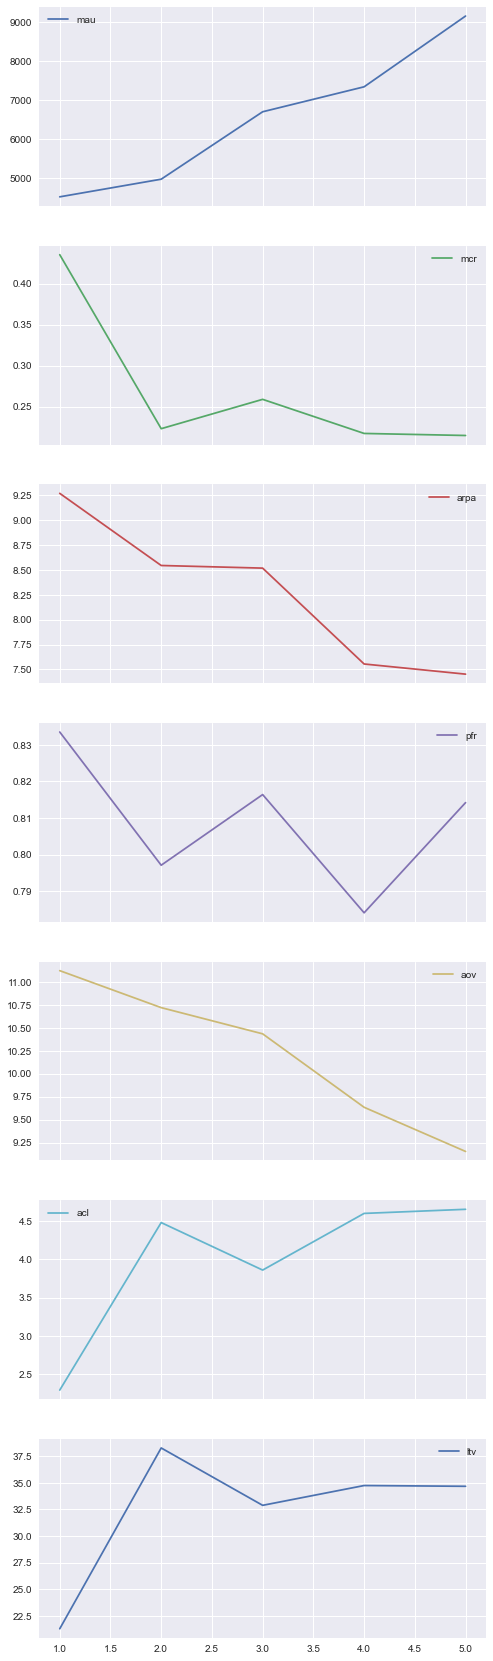

In [130]:
kpis_ya.loc[1:5,'mau':'ltv'].plot(subplots = True, figsize = (8, 30)); #, xticks = xTicks[1:-1]);

## purchasing subscriptions approach

In [ ]:
# !! In this approach the mau are purch_cust

In [133]:
kpis_pa = revenue.copy()
kpis_pa

,index,sale_year,sale_month,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,0,2020,dec20,enterprise,month,388,1737,4264.12,19198.64,386,1730,1349,14934.52
1,1,2020,dec20,enterprise,year,106,331,2189.98,6523.72,106,330,225,4333.74
2,2,2020,dec20,smart,month,111,615,389.48,2197.42,110,603,504,1807.94
3,3,2020,dec20,smart,year,80,372,1695.00,8730.00,80,372,292,7035.00
4,4,2020,dec20,smart plus,month,56,45,503.44,404.55,15,43,-11,-98.89
5,5,2020,dec20,smart plus,year,13,49,207.87,887.52,5,49,36,679.65
6,6,2021,jan21,enterprise,month,684,3031,7517.16,33419.70,683,2869,2347,25902.54
7,7,2021,jan21,enterprise,year,75,347,1442.25,6843.53,75,347,272,5401.28
8,8,2021,jan21,smart,month,203,1076,711.48,3810.92,201,1013,873,3099.44
9,9,2021,jan21,smart,year,25,339,625.00,8475.00,25,339,314,7850.00


In [134]:
kpis_pa_m = revenue_m.copy()
kpis_pa_m

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18


### Churn rate by month

In [136]:
# Compute the monthly churn rate
mcrList_pa_m = []
for i in range(len(kpis_pa_m)):
    if i == 0:
        mcrList_pa_m.append(1)
    else:
        x = kpis_pa_m.cancel_cust[i]/kpis_pa_m.purch_cust[i-1]
        mcrList_pa_m.append(round(x,4))
mcrList_pa_m

[1, 0.3265, 0.2038, 0.2627, 0.2301, 0.2519, 0.0327]

In [137]:
# Add Kpis to the dataframe
# Monthly Active Users == purch_cust
# kpis_ya['mau'] = active_y.mau

# Monthly Churn Rate
kpis_pa_m['mcr'] = mcrList_pa_m

kpis_pa_m

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mcr
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96,1.0000
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73,0.3265
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34,0.2038
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83,0.2627
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79,0.2301
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75,0.2519
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18,0.0327


### ltv by month

In [138]:
# Average Revenue Per Acount
kpis_pa_m['arpa'] = round(kpis_pa_m.revenue/kpis_pa_m.purch_cust,4)

# Purchase Frequency Rate
kpis_pa_m['pfr'] = round(kpis_pa_m.freq/kpis_pa_m.purch_cust,4)
# !!! kpis_pa_m['pfr'] = round(kpis_pa_m.n_purch/kpis_pa_m.purch_cust,4) --> it has to do with the revenue concept

# Average Order Value
kpis_pa_m['aov'] = round(kpis_pa_m.revenue/kpis_pa_m.freq,4)

# Customer Value == Average Revenue Per Account
# kpis_pa_m['cv'] = round(kpis_pa_m.pfr * kpis_pa_m.aov,2)

# Churn Rate
# kpis_pa_m['mcr'] = mcrList_ya # !!!

# Average Customer Lifespan
kpis_pa_m['acl'] = 1/kpis_pa_m.mcr

# Lifetime Value
kpis_pa_m['ltv'] = kpis_pa_m.arpa * kpis_pa_m.acl

kpis_pa_m

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mcr,arpa,pfr,aov,acl,ltv
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96,1.0000,9.2020,0.7681,11.9799,1.000000,9.202000
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73,0.3265,9.2705,0.8335,11.1227,3.062787,28.393568
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34,0.2038,8.5452,0.7971,10.7201,4.906771,41.929342
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83,0.2627,8.5188,0.8164,10.4347,3.806624,32.427864
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79,0.2301,7.5551,0.7841,9.6351,4.345937,32.833985
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75,0.2519,7.4530,0.8142,9.1541,3.969829,29.587138
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18,0.0327,7.5086,0.8262,9.0877,30.581040,229.620795


In [142]:
kpis_pa_m.acl[1:-1].mean()

4.01838957046987

In [143]:
kpis_pa_m.ltv[1:-1].mean()

33.03437962014969

In [149]:
kpis_pa_m.columns

Index(['sale_year', 'sale_month', 'n_cancel', 'n_purch', 'cancel_amount',
       'purch_amount', 'cancel_cust', 'purch_cust', 'freq', 'revenue', 'mcr',
       'arpa', 'pfr', 'aov', 'acl', 'ltv'],
      dtype='object')

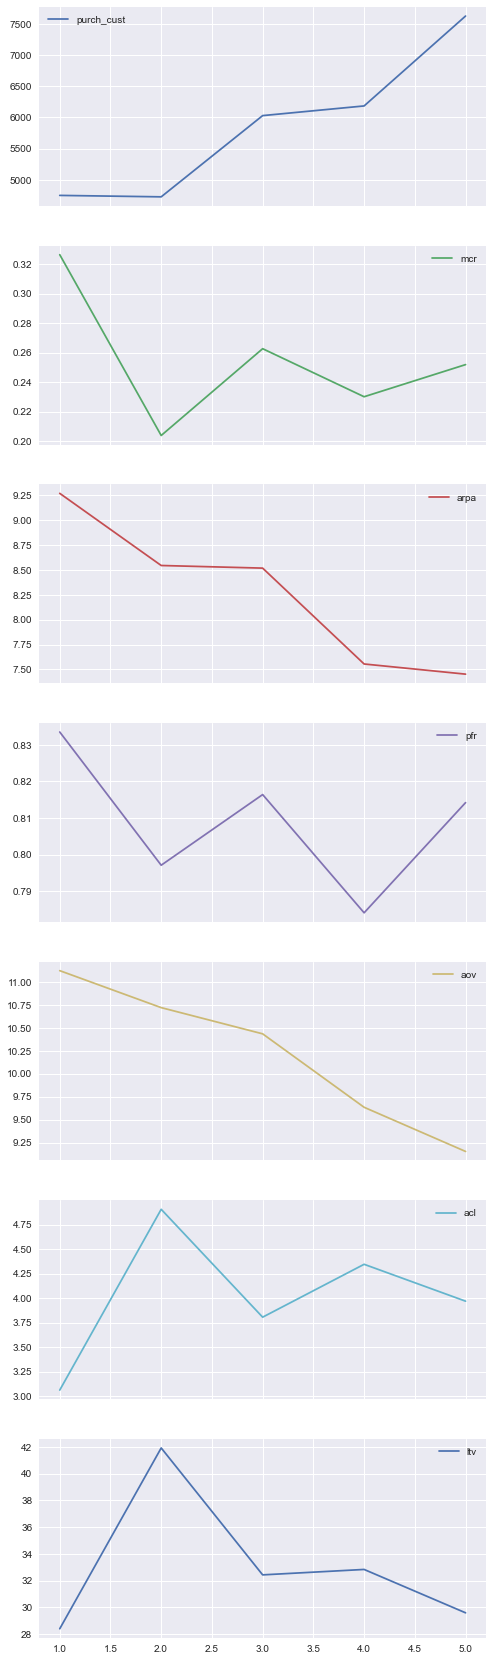

In [151]:
kpis_pa_m.loc[1:5,['purch_cust', 
                   'mcr', 
                   'arpa', 
                   'pfr',
                   'aov',
                   'acl',
                   'ltv']].plot(subplots = True, figsize = (8, 30)); #, xticks = xTicks[1:-1]);

## Compare 2 approaches

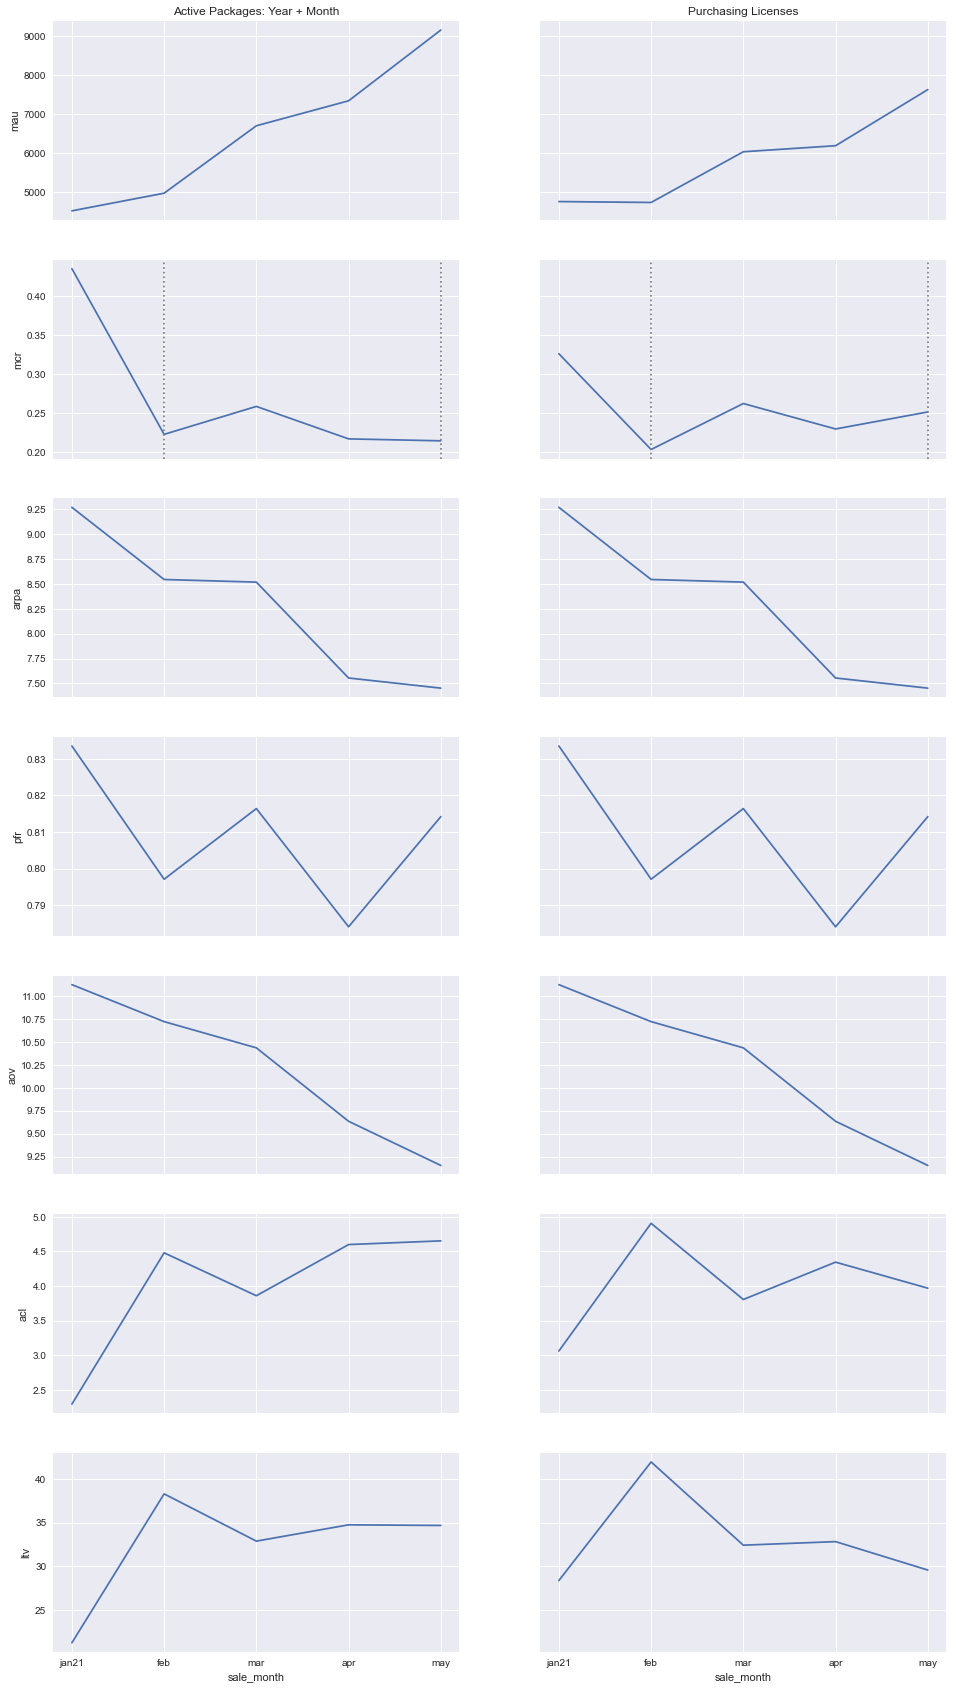

In [181]:
f, ax = plt.subplots(7,2, figsize=(16,30), sharex = 'col', sharey = 'row')


for i,c in enumerate(kpis_ya.columns[10:]):    
    sns.lineplot(x = 'sale_month', y= c, 
             data=kpis_ya.iloc[1:-1,:], 
             ax=ax[i,0],
             legend = True)
#    ax[i,0].set_title('Active Packages: Year + Month - ' + c)
       
        
sns.lineplot(x = 'sale_month', y= 'purch_cust', 
             data=kpis_pa_m.iloc[1:-1,:], 
             ax=ax[0,1],
             legend = True)
#ax[0,1].set_title('Purchasing Licenses - purch_cust')

for i,c in enumerate(kpis_pa_m.columns[10:]):    
    sns.lineplot(x = 'sale_month', y= c, 
             data=kpis_pa_m.iloc[1:-1,:], 
             ax=ax[i+1,1],
             legend = True)
#    ax[i+1,1].set_title('Purchasing Licenses - ' + c)

    
ax[1,0].axvline(x=2, linestyle=':', color='gray')
ax[1,0].axvline(x=5, linestyle=':', color='gray')    

ax[1,1].axvline(x=2, linestyle=':', color='gray')
ax[1,1].axvline(x=5, linestyle=':', color='gray')    


ax[0,0].set_title('Active Packages: Year + Month')
ax[0,1].set_title('Purchasing Licenses')    
    
plt.show()


ARPA, PFR and AOV remain the same in both approaches.  
The change in the other kpis is rather small.

The Churn Rate in January is meaningless by definition.

## churn rate by license name and billing period - purchases approach

In [205]:
# Compute Monthly Churn Rate
mcrList_pa = []

months = kpis_pa.sale_month.unique().tolist()

for i,m in enumerate(kpis_pa.sale_month.unique()):
    for l in kpis_pa.license_name.unique():
        for b in kpis_pa.billing_period.unique():
            cancel = 0
            purch = 0
            if i == 0:
            #if kpis_pa.sale_month[(kpis_pa.month = m) & (kpis_pa.license_name == l) & (kpis_pa.billing_period == b)] == 'dec20':
                mcrList_pa.append(1)
            else:
                cancel = kpis_pa.cancel_cust[(kpis_pa.sale_month == m) & (kpis_pa.license_name == l) & (kpis_pa.billing_period == b)].values[0]
                purch = kpis_pa.purch_cust[(kpis_pa.sale_month == months[i-1]) & (kpis_pa.license_name == l) & (kpis_pa.billing_period == b)].values[0]
                # print(i,m,l,b, months[i-1], cancel, purch)
                x = cancel/purch
                # print(x)
                mcrList_pa.append(round(x,4))
                
mcrList_pa


[1,
 1,
 1,
 1,
 1,
 1,
 0.3948,
 0.2273,
 0.3333,
 0.0672,
 0.6047,
 0.3265,
 0.2032,
 0.3084,
 0.1658,
 0.1386,
 0.5798,
 0.1463,
 0.2474,
 0.5394,
 0.2084,
 0.2033,
 0.4273,
 0.1408,
 0.2204,
 0.3739,
 0.1954,
 0.1711,
 0.3275,
 0.0838,
 0.209,
 0.3425,
 0.1922,
 0.2686,
 0.4053,
 0.1525,
 0.0337,
 0.0359,
 0.0233,
 0.0177,
 0.0412,
 0.0209]

In [210]:
# MCR to dataframe
kpis_pa['mcr'] = mcrList_pa

kpis_pa

,index,sale_year,sale_month,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mcr
0,0,2020,dec20,enterprise,month,388,1737,4264.12,19198.64,386,1730,1349,14934.52,1.0000
1,1,2020,dec20,enterprise,year,106,331,2189.98,6523.72,106,330,225,4333.74,1.0000
2,2,2020,dec20,smart,month,111,615,389.48,2197.42,110,603,504,1807.94,1.0000
3,3,2020,dec20,smart,year,80,372,1695.00,8730.00,80,372,292,7035.00,1.0000
4,4,2020,dec20,smart plus,month,56,45,503.44,404.55,15,43,-11,-98.89,1.0000
5,5,2020,dec20,smart plus,year,13,49,207.87,887.52,5,49,36,679.65,1.0000
6,6,2021,jan21,enterprise,month,684,3031,7517.16,33419.70,683,2869,2347,25902.54,0.3948
7,7,2021,jan21,enterprise,year,75,347,1442.25,6843.53,75,347,272,5401.28,0.2273
8,8,2021,jan21,smart,month,203,1076,711.48,3810.92,201,1013,873,3099.44,0.3333
9,9,2021,jan21,smart,year,25,339,625.00,8475.00,25,339,314,7850.00,0.0672


## LTV by license name and billing period - purchases approach

In [211]:
# Average Revenue Per Acount
kpis_pa['arpa'] = round(kpis_pa.revenue/kpis_pa.purch_cust,4)

# Purchase Frequency Rate
kpis_pa['pfr'] = round(kpis_pa.freq/kpis_pa.purch_cust,4)
# !!! kpis_pa['pfr'] = round(kpis_pa.n_purch/kpis_pa.purch_cust,4) --> it has to do with the revenue concept

# Average Order Value
kpis_pa['aov'] = round(kpis_pa.revenue/kpis_pa.freq,4)

# Customer Value == Average Revenue Per Account
# kpis_pa['cv'] = round(kpis_pa.pfr * kpis_pa.aov,2)

# Churn Rate
# kpis_pa['mcr'] = mcrList_pa # !!!

# Average Customer Lifespan
kpis_pa['acl'] = 1/kpis_pa.mcr

# Lifetime Value
kpis_pa['ltv'] = kpis_pa.arpa * kpis_pa.acl

kpis_pa

,index,sale_year,sale_month,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mcr,arpa,pfr,aov,acl,ltv
0,0,2020,dec20,enterprise,month,388,1737,4264.12,19198.64,386,1730,1349,14934.52,1.0000,8.6327,0.7798,11.0708,1.000000,8.632700
1,1,2020,dec20,enterprise,year,106,331,2189.98,6523.72,106,330,225,4333.74,1.0000,13.1325,0.6818,19.2611,1.000000,13.132500
2,2,2020,dec20,smart,month,111,615,389.48,2197.42,110,603,504,1807.94,1.0000,2.9982,0.8358,3.5872,1.000000,2.998200
3,3,2020,dec20,smart,year,80,372,1695.00,8730.00,80,372,292,7035.00,1.0000,18.9113,0.7849,24.0925,1.000000,18.911300
4,4,2020,dec20,smart plus,month,56,45,503.44,404.55,15,43,-11,-98.89,1.0000,-2.2998,-0.2558,8.9900,1.000000,-2.299800
5,5,2020,dec20,smart plus,year,13,49,207.87,887.52,5,49,36,679.65,1.0000,13.8704,0.7347,18.8792,1.000000,13.870400
6,6,2021,jan21,enterprise,month,684,3031,7517.16,33419.70,683,2869,2347,25902.54,0.3948,9.0284,0.8181,11.0364,2.532928,22.868288
7,7,2021,jan21,enterprise,year,75,347,1442.25,6843.53,75,347,272,5401.28,0.2273,15.5656,0.7839,19.8576,4.399472,68.480422
8,8,2021,jan21,smart,month,203,1076,711.48,3810.92,201,1013,873,3099.44,0.3333,3.0597,0.8618,3.5503,3.000300,9.180018
9,9,2021,jan21,smart,year,25,339,625.00,8475.00,25,339,314,7850.00,0.0672,23.1563,0.9263,25.0000,14.880952,344.587798


## Average KPIS: ARPA, AOV, ACL

In [304]:
# Average ARPA, AOV and ACL along all the months
avgKpis = kpis_pa.groupby(['license_name','billing_period']).agg({'arpa':'mean', 
                                                                  'aov': 'mean', # q80, 
                                                                  'acl':'mean'})
avgKpis.reset_index(inplace = True)
avgKpis

,license_name,billing_period,arpa,aov,acl
0,enterprise,month,8.744986,11.054486,7.355959
1,enterprise,year,12.465371,19.985871,6.277900
2,smart,month,3.003071,3.519414,9.724172
3,smart,year,20.608414,24.876029,13.439931
4,smart plus,month,5.908686,8.990000,5.215901
5,smart plus,year,13.811886,16.402743,12.048253


In [281]:
# Average ARPA, AOV and ACL along all the licenses
kpis_pa.groupby(['billing_period']).agg({'arpa':'mean', 'aov':'mean', 'acl':'mean'})

,arpa,aov,acl
billing_period,,,
month,5.885581,7.854633,7.432011
year,15.628557,20.421548,10.588695


There are customers who purchase and cancel packages at the same time. That's the reason why the AOV is higher (it takes into account those cancelations).

In [286]:
# Average ARPA and AOV 
kpis_pa.agg({'arpa':'mean', 'aov':'mean','acl':'mean'})

arpa    10.757069
aov     14.138090
acl      9.010353
dtype: float64

In [305]:
# ???
# Estimate Prices of the Year Packages
avgKpis['yearAov'] = list(map(lambda x,y: round(x*y,3), # if z == 'year' else np.nan, 
                              avgKpis.aov, 
                              avgKpis.acl)) #, 
                              # avgKpis.billing_period))

avgKpis

,license_name,billing_period,arpa,aov,acl,yearAov
0,enterprise,month,8.744986,11.054486,7.355959,81.316
1,enterprise,year,12.465371,19.985871,6.277900,125.469
2,smart,month,3.003071,3.519414,9.724172,34.223
3,smart,year,20.608414,24.876029,13.439931,334.332
4,smart plus,month,5.908686,8.990000,5.215901,46.891
5,smart plus,year,13.811886,16.402743,12.048253,197.624


## Plot MCR and LTV

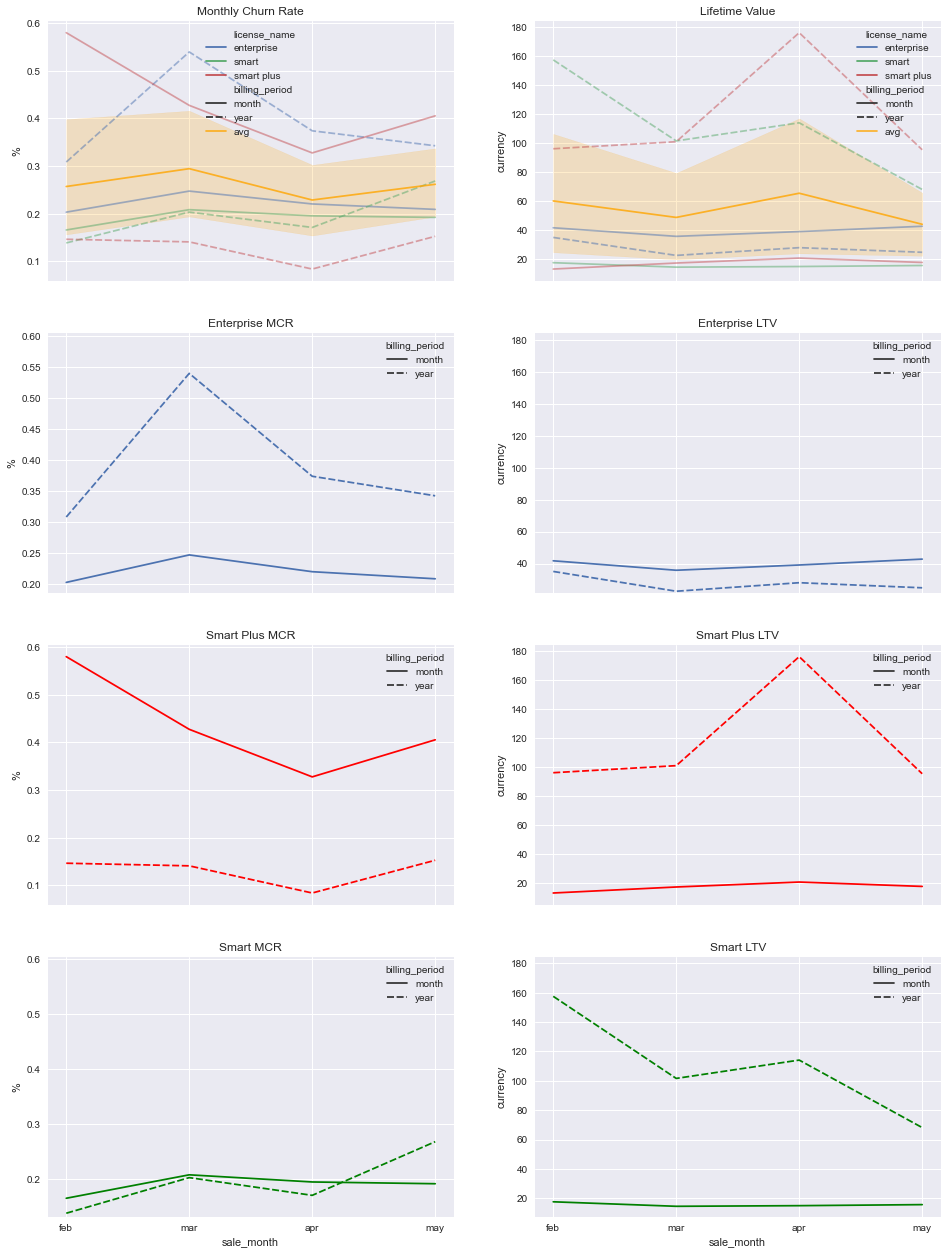

In [275]:
f, ax = plt.subplots(4,2,figsize=(16,22), sharex = 'col')


# MCR Column
sns.lineplot(x='sale_month', y = 'mcr', 
             hue = 'license_name', style = 'billing_period',
             data = kpis_pa[kpis_pa.sale_month.isin(months[2:-1])],
             ax = ax[0,0], alpha = 0.5)
sns.lineplot(x='sale_month', y = 'mcr', 
             data = kpis_pa[kpis_pa.sale_month.isin(months[2:-1])],
             ax = ax[0,0], color = 'orange', alpha = 0.8, label = 'avg')


sns.lineplot(x='sale_month', y = 'mcr', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'enterprise')],
             ax = ax[1,0])

sns.lineplot(x='sale_month', y = 'mcr', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'smart plus')],
             ax = ax[2,0], color = 'r')

sns.lineplot(x='sale_month', y = 'mcr', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'smart')],
             ax = ax[3,0], color = 'g')


# LTV Column
sns.lineplot(x='sale_month', y = 'ltv', 
             hue = 'license_name', style = 'billing_period',
             data = kpis_pa[kpis_pa.sale_month.isin(months[2:-1])],
             ax = ax[0,1], alpha = 0.5)
sns.lineplot(x='sale_month', y = 'ltv', 
             data = kpis_pa[kpis_pa.sale_month.isin(months[2:-1])],
             ax = ax[0,1], color = 'orange', alpha = 0.8, label = 'avg')


sns.lineplot(x='sale_month', y = 'ltv', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'enterprise')],
             ax = ax[1,1])

sns.lineplot(x='sale_month', y = 'ltv', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'smart plus')],
             ax = ax[2,1], color = 'r')

sns.lineplot(x='sale_month', y = 'ltv', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'smart')],
             ax = ax[3,1], color = 'g')


# y labels
for i in range(4):
    ax[i,0].set_ylabel('%')
for i in range(4):
    ax[i,1].set_ylabel('currency')

# y lims    
for i in range(1,4):
    ax[i,0].set_ylim(top=ax[0,0].get_ylim()[1])
for i in range(1,4):
    ax[i,1].set_ylim(top=ax[0,1].get_ylim()[1])

# titles    
ax[0,0].set_title('Monthly Churn Rate')
ax[1,0].set_title('Enterprise MCR')
ax[2,0].set_title('Smart Plus MCR')
ax[3,0].set_title('Smart MCR')
ax[0,1].set_title('Lifetime Value')
ax[1,1].set_title('Enterprise LTV')
ax[2,1].set_title('Smart Plus LTV')
ax[3,1].set_title('Smart LTV')

# legend
ax[0,0].legend()

plt.show()


__anomaly__:  

The __highest lifetime values__ correspond to year billing period subscriptions of smart plus and smart license.  
It is interesting the lowest lifetime values correspond to enterprise license that comprises the highest revenue.

__anomaly__:  
  
The Smart Plus Month billing period churn rate is unusually high.   
The Enterprise Year billing period churn rate is unusually high in march and april.  
  
The Smart Plus Year billing period __churn rate is unusually low__.   


# Further kpis

Extra KPIs computed:
* Month on Month Growth
* Gross Churn Rate

## Year Active Packages Approach

In [239]:
kpis_ya

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mau,mcr,arpa,pfr,aov,acl,ltv
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96,2395,1.0000,9.2020,0.7681,11.9799,1.000000,9.202000
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73,4512,0.4355,9.2705,0.8335,11.1227,2.296211,21.287026
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34,4965,0.2232,8.5452,0.7971,10.7201,4.480287,38.284946
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83,6696,0.2590,8.5188,0.8164,10.4347,3.861004,32.891120
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79,7337,0.2174,7.5551,0.7841,9.6351,4.599816,34.752070
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75,9154,0.2149,7.4530,0.8142,9.1541,4.653327,34.681247
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18,4563,0.0273,7.5086,0.8262,9.0877,36.630037,275.040293


### Month over Month Growth

In [240]:
# Compute Month over Month Growth

MoM_ya = []

for i in range(len(kpis_ya)):
    if i == 0:
        MoM_ya.append(0)
    else:
        x = (kpis_ya.revenue[i]-kpis_ya.revenue[i-1])/kpis_ya.revenue[i-1]
        MoM_ya.append(round(x,4))
        
MoM_ya

[0, 0.5347, -0.0827, 0.2715, -0.0903, 0.2163, -0.8137]

In [241]:
# Add MoM to dataframe

kpis_ya['mom'] = MoM_ya


# net profit
kpis_ya['netProfit'] = kpis_ya.revenue*0.4
kpis_ya

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mau,mcr,arpa,pfr,aov,acl,ltv,mom,netProfit
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96,2395,1.0000,9.2020,0.7681,11.9799,1.000000,9.202000,0.0000,11476.784
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73,4512,0.4355,9.2705,0.8335,11.1227,2.296211,21.287026,0.5347,17613.892
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34,4965,0.2232,8.5452,0.7971,10.7201,4.480287,38.284946,-0.0827,16157.336
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83,6696,0.2590,8.5188,0.8164,10.4347,3.861004,32.891120,0.2715,20543.932
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79,7337,0.2174,7.5551,0.7841,9.6351,4.599816,34.752070,-0.0903,18688.316
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75,9154,0.2149,7.4530,0.8142,9.1541,4.653327,34.681247,0.2163,22731.500
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18,4563,0.0273,7.5086,0.8262,9.0877,36.630037,275.040293,-0.8137,4234.872


### Gross Churn Rate

In [242]:
# Compute Gross Churn Rate

gcr_ya = []

for i in range(len(kpis_ya)):
    if i == 0:
        gcr_ya.append(0)
    else:
        x = kpis_ya.cancel_amount[i]/kpis_ya.revenue[i-1]
        gcr_ya.append(round(x,4))
        
gcr_ya

[0, 0.3827, 0.2582, 0.3574, 0.3049, 0.3439, 0.0416]

In [243]:
# Add GCR to dataframe
kpis_ya['gcr'] = gcr_ya
kpis_ya

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mau,mcr,arpa,pfr,aov,acl,ltv,mom,netProfit,gcr
0,2020,dec20,754,3149,9249.89,37941.85,695,3118,2395,28691.96,2395,1.0000,9.2020,0.7681,11.9799,1.000000,9.202000,0.0000,11476.784,0.0000
1,2021,jan21,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73,4512,0.4355,9.2705,0.8335,11.1227,2.296211,21.287026,0.5347,17613.892,0.3827
2,2021,feb,1007,4775,11370.16,51763.50,968,4727,3768,40393.34,4965,0.2232,8.5452,0.7971,10.7201,4.480287,38.284946,-0.0827,16157.336,0.2582
3,2021,mar,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83,6696,0.2590,8.5188,0.8164,10.4347,3.861004,32.891120,0.2715,20543.932,0.3574
4,2021,apr,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79,7337,0.2174,7.5551,0.7841,9.6351,4.599816,34.752070,-0.0903,18688.316,0.3049
5,2021,may,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75,9154,0.2149,7.4530,0.8142,9.1541,4.653327,34.681247,0.2163,22731.500,0.3439
6,2021,jun,250,1415,2365.99,12953.17,249,1410,1165,10587.18,4563,0.0273,7.5086,0.8262,9.0877,36.630037,275.040293,-0.8137,4234.872,0.0416


## purchasing subscriptions approach

In [244]:
kpis_pa

,index,sale_year,sale_month,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mcr,arpa,pfr,aov,acl,ltv
0,0,2020,dec20,enterprise,month,388,1737,4264.12,19198.64,386,1730,1349,14934.52,1.0000,8.6327,0.7798,11.0708,1.000000,8.632700
1,1,2020,dec20,enterprise,year,106,331,2189.98,6523.72,106,330,225,4333.74,1.0000,13.1325,0.6818,19.2611,1.000000,13.132500
2,2,2020,dec20,smart,month,111,615,389.48,2197.42,110,603,504,1807.94,1.0000,2.9982,0.8358,3.5872,1.000000,2.998200
3,3,2020,dec20,smart,year,80,372,1695.00,8730.00,80,372,292,7035.00,1.0000,18.9113,0.7849,24.0925,1.000000,18.911300
4,4,2020,dec20,smart plus,month,56,45,503.44,404.55,15,43,-11,-98.89,1.0000,-2.2998,-0.2558,8.9900,1.000000,-2.299800
5,5,2020,dec20,smart plus,year,13,49,207.87,887.52,5,49,36,679.65,1.0000,13.8704,0.7347,18.8792,1.000000,13.870400
6,6,2021,jan21,enterprise,month,684,3031,7517.16,33419.70,683,2869,2347,25902.54,0.3948,9.0284,0.8181,11.0364,2.532928,22.868288
7,7,2021,jan21,enterprise,year,75,347,1442.25,6843.53,75,347,272,5401.28,0.2273,15.5656,0.7839,19.8576,4.399472,68.480422
8,8,2021,jan21,smart,month,203,1076,711.48,3810.92,201,1013,873,3099.44,0.3333,3.0597,0.8618,3.5503,3.000300,9.180018
9,9,2021,jan21,smart,year,25,339,625.00,8475.00,25,339,314,7850.00,0.0672,23.1563,0.9263,25.0000,14.880952,344.587798


### Month over Month Growth

In [245]:
# Compute Month over Month Growth
MoM_pa = []

months = kpis_pa.sale_month.unique().tolist()

for i,m in enumerate(kpis_pa.sale_month.unique()):
    for l in kpis_pa.license_name.unique():
        for b in kpis_pa.billing_period.unique():
            rev2 = 0
            rev1 = 0
            
            if i == 0:
                MoM_pa.append(1)
                
            else:
                rev2 = kpis_pa.revenue[(kpis_pa.sale_month == m) & (kpis_pa.license_name == l) & (kpis_pa.billing_period == b)].values[0]
                rev1 = kpis_pa.revenue[(kpis_pa.sale_month == months[i-1]) & (kpis_pa.license_name == l) & (kpis_pa.billing_period == b)].values[0]
                # print(i,m,l,b, months[i-1], rev2, rev1)
                x = (rev2-rev1)/rev1
                # print(x)
                MoM_pa.append(round(x,4))
                
MoM_pa


[1,
 1,
 1,
 1,
 1,
 1,
 0.7344,
 0.2463,
 0.7143,
 0.1158,
 -9.6364,
 0.3646,
 -0.1825,
 -0.5178,
 -0.0089,
 0.0261,
 3.0842,
 1.1552,
 0.1669,
 0.5813,
 0.3343,
 0.049,
 1.0825,
 0.36,
 -0.0423,
 -0.3545,
 0.1154,
 -0.3462,
 0.1782,
 -0.3588,
 0.0326,
 -0.4662,
 0.2462,
 -0.0624,
 1.0231,
 0.5963,
 -0.8464,
 -0.5915,
 -0.8168,
 -0.8311,
 -0.7736,
 -0.8506]

In [246]:
# Add MoM to dataframe

kpis_pa['mom'] = MoM_pa


# net profit
kpis_pa['netProfit'] = kpis_pa.revenue*0.4
kpis_pa

,index,sale_year,sale_month,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mcr,arpa,pfr,aov,acl,ltv,mom,netProfit
0,0,2020,dec20,enterprise,month,388,1737,4264.12,19198.64,386,1730,1349,14934.52,1.0000,8.6327,0.7798,11.0708,1.000000,8.632700,1.0000,5973.808
1,1,2020,dec20,enterprise,year,106,331,2189.98,6523.72,106,330,225,4333.74,1.0000,13.1325,0.6818,19.2611,1.000000,13.132500,1.0000,1733.496
2,2,2020,dec20,smart,month,111,615,389.48,2197.42,110,603,504,1807.94,1.0000,2.9982,0.8358,3.5872,1.000000,2.998200,1.0000,723.176
3,3,2020,dec20,smart,year,80,372,1695.00,8730.00,80,372,292,7035.00,1.0000,18.9113,0.7849,24.0925,1.000000,18.911300,1.0000,2814.000
4,4,2020,dec20,smart plus,month,56,45,503.44,404.55,15,43,-11,-98.89,1.0000,-2.2998,-0.2558,8.9900,1.000000,-2.299800,1.0000,-39.556
5,5,2020,dec20,smart plus,year,13,49,207.87,887.52,5,49,36,679.65,1.0000,13.8704,0.7347,18.8792,1.000000,13.870400,1.0000,271.860
6,6,2021,jan21,enterprise,month,684,3031,7517.16,33419.70,683,2869,2347,25902.54,0.3948,9.0284,0.8181,11.0364,2.532928,22.868288,0.7344,10361.016
7,7,2021,jan21,enterprise,year,75,347,1442.25,6843.53,75,347,272,5401.28,0.2273,15.5656,0.7839,19.8576,4.399472,68.480422,0.2463,2160.512
8,8,2021,jan21,smart,month,203,1076,711.48,3810.92,201,1013,873,3099.44,0.3333,3.0597,0.8618,3.5503,3.000300,9.180018,0.7143,1239.776
9,9,2021,jan21,smart,year,25,339,625.00,8475.00,25,339,314,7850.00,0.0672,23.1563,0.9263,25.0000,14.880952,344.587798,0.1158,3140.000


### Gross Churn Rate

In [247]:
# Compute Gross Churn Rate
gcr_pa = []

months = kpis_pa.sale_month.unique().tolist()

for i,m in enumerate(kpis_pa.sale_month.unique()):
    for l in kpis_pa.license_name.unique():
        for b in kpis_pa.billing_period.unique():
            cancel2 = 0
            rev1 = 0
            
            if i == 0:
                gcr_pa.append(1)
                
            else:
                cancel2 = kpis_pa.cancel_amount[(kpis_pa.sale_month == m) & (kpis_pa.license_name == l) & (kpis_pa.billing_period == b)].values[0]
                rev1 = kpis_pa.revenue[(kpis_pa.sale_month == months[i-1]) & (kpis_pa.license_name == l) & (kpis_pa.billing_period == b)].values[0]
                # print(i,m,l,b, months[i-1], rev2, rev1)
                x = cancel2/rev1
                # print(x)
                gcr_pa.append(round(x,4))
                
gcr_pa


[1,
 1,
 1,
 1,
 1,
 1,
 0.5033,
 0.3328,
 0.3935,
 0.0888,
 -2.7273,
 0.6117,
 0.2479,
 0.4097,
 0.212,
 0.149,
 0.7474,
 0.2931,
 0.3227,
 1.0127,
 0.2588,
 0.2359,
 0.518,
 0.232,
 0.2756,
 0.6261,
 0.2338,
 0.2189,
 0.4084,
 0.1824,
 0.2672,
 0.7218,
 0.2314,
 0.343,
 0.5357,
 0.1651,
 0.0415,
 0.0845,
 0.027,
 0.0241,
 0.0514,
 0.023]

In [249]:
# Add GCR to dataframe
kpis_pa['gcr'] = gcr_pa
kpis_pa

,index,sale_year,sale_month,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,mcr,arpa,pfr,aov,acl,ltv,mom,netProfit,gcr
0,0,2020,dec20,enterprise,month,388,1737,4264.12,19198.64,386,1730,1349,14934.52,1.0000,8.6327,0.7798,11.0708,1.000000,8.632700,1.0000,5973.808,1.0000
1,1,2020,dec20,enterprise,year,106,331,2189.98,6523.72,106,330,225,4333.74,1.0000,13.1325,0.6818,19.2611,1.000000,13.132500,1.0000,1733.496,1.0000
2,2,2020,dec20,smart,month,111,615,389.48,2197.42,110,603,504,1807.94,1.0000,2.9982,0.8358,3.5872,1.000000,2.998200,1.0000,723.176,1.0000
3,3,2020,dec20,smart,year,80,372,1695.00,8730.00,80,372,292,7035.00,1.0000,18.9113,0.7849,24.0925,1.000000,18.911300,1.0000,2814.000,1.0000
4,4,2020,dec20,smart plus,month,56,45,503.44,404.55,15,43,-11,-98.89,1.0000,-2.2998,-0.2558,8.9900,1.000000,-2.299800,1.0000,-39.556,1.0000
5,5,2020,dec20,smart plus,year,13,49,207.87,887.52,5,49,36,679.65,1.0000,13.8704,0.7347,18.8792,1.000000,13.870400,1.0000,271.860,1.0000
6,6,2021,jan21,enterprise,month,684,3031,7517.16,33419.70,683,2869,2347,25902.54,0.3948,9.0284,0.8181,11.0364,2.532928,22.868288,0.7344,10361.016,0.5033
7,7,2021,jan21,enterprise,year,75,347,1442.25,6843.53,75,347,272,5401.28,0.2273,15.5656,0.7839,19.8576,4.399472,68.480422,0.2463,2160.512,0.3328
8,8,2021,jan21,smart,month,203,1076,711.48,3810.92,201,1013,873,3099.44,0.3333,3.0597,0.8618,3.5503,3.000300,9.180018,0.7143,1239.776,0.3935
9,9,2021,jan21,smart,year,25,339,625.00,8475.00,25,339,314,7850.00,0.0672,23.1563,0.9263,25.0000,14.880952,344.587798,0.1158,3140.000,0.0888


## plot MoM & GCR

In [ ]:
# As the first value is defined as 1, those kpis are only meaningful after the second month. Like de MCR

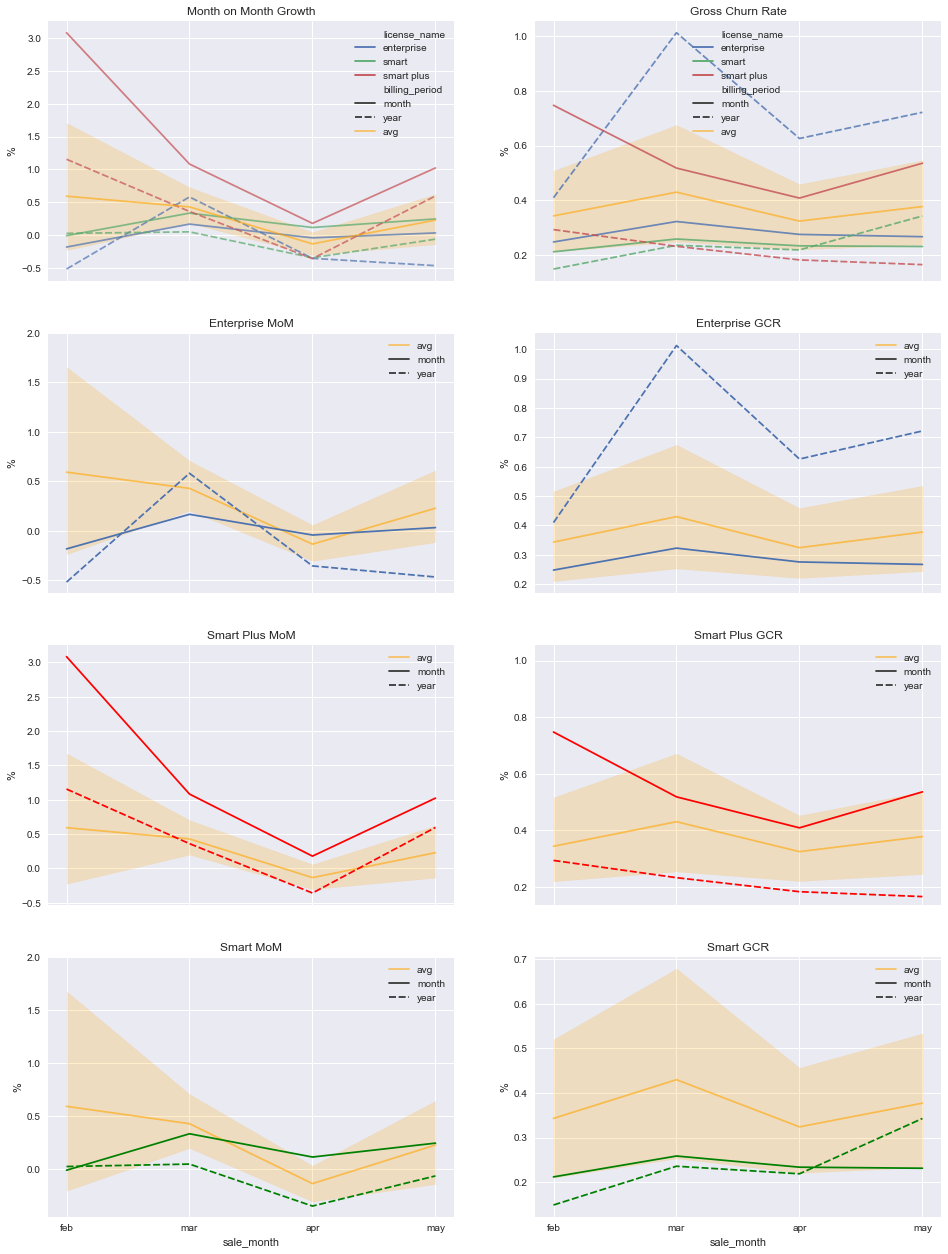

In [257]:
f, ax = plt.subplots(4,2,figsize=(16,22), sharex = 'col')


# MoM Column
sns.lineplot(x='sale_month', y = 'mom', 
             hue = 'license_name', style = 'billing_period',
             data = kpis_pa[kpis_pa.sale_month.isin(months[2:-1])],
             ax = ax[0,0], alpha = 0.7)

# Plot the average in every ax
for i in range(4):
    sns.lineplot(x='sale_month', y = 'mom', 
                 data = kpis_pa[kpis_pa.sale_month.isin(months[2:-1])],
                 ax = ax[i,0], color = 'orange', alpha = 0.6, label = 'avg')


sns.lineplot(x='sale_month', y = 'mom', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'enterprise')],
             ax = ax[1,0])

sns.lineplot(x='sale_month', y = 'mom', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'smart plus')],
             ax = ax[2,0], color = 'r')

sns.lineplot(x='sale_month', y = 'mom', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'smart')],
             ax = ax[3,0], color = 'g')


# GCR Column
sns.lineplot(x='sale_month', y = 'gcr', 
             hue = 'license_name', style = 'billing_period',
             data = kpis_pa[kpis_pa.sale_month.isin(months[2:-1])],
             ax = ax[0,1], alpha = 0.8)

# Plot the average in every ax
for i in range(4):
    sns.lineplot(x='sale_month', y = 'gcr', 
                 data = kpis_pa[kpis_pa.sale_month.isin(months[2:-1])],
                 ax = ax[i,1], color = 'orange', alpha = 0.6, label = 'avg')


sns.lineplot(x='sale_month', y = 'gcr', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'enterprise')],
             ax = ax[1,1])

sns.lineplot(x='sale_month', y = 'gcr', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'smart plus')],
             ax = ax[2,1], color = 'r')

sns.lineplot(x='sale_month', y = 'gcr', 
             style = 'billing_period',
             data = kpis_pa[(kpis_pa.sale_month.isin(months[2:-1])) & (kpis_pa.license_name == 'smart')],
             ax = ax[3,1], color = 'g')


# y labels
for i in range(4):
    ax[i,0].set_ylabel('%')
for i in range(4):
    ax[i,1].set_ylabel('%')

# y lims    
#for i in range(1,4):
ax[1,0].set_ylim(top=2)
ax[3,0].set_ylim(top=2)
for i in range(1,3):
    ax[i,1].set_ylim(top=ax[0,1].get_ylim()[1])

# titles    
ax[0,0].set_title('Month on Month Growth')
ax[1,0].set_title('Enterprise MoM')
ax[2,0].set_title('Smart Plus MoM')
ax[3,0].set_title('Smart MoM')
ax[0,1].set_title('Gross Churn Rate')
ax[1,1].set_title('Enterprise GCR')
ax[2,1].set_title('Smart Plus GCR')
ax[3,1].set_title('Smart GCR')

# legend
for i in range(4):
    ax[i,0].legend()
    ax[i,1].legend()

plt.show()


Usually the year subscriptions grow slower than month billing period subscriptions.

__Anomaly__:  
  
The Gross Churn Rate of the Enterprise license with year billing period is the highest.  
The Smart Plus Year Subscriptions has __the highest Month on Month growth rate__.


## Save kpis_pa

In [258]:
# kpis_pa.to_csv('data/kpis.csv')


# BONUS

* Define the packages a subscription price increase is possible for. Explain the results

For this task it would be necessary to __explore the customers (license_id)__ and how their expending is distributed.  
It is mainly necessary to __explore the prices of the packages__ and determine whether they could be increased. 

# Explore the Customers - license_id

In [309]:
subs.head(10)

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021
5,2020-12-30 16:01:00,30688,497,purchase,month,enterprise,10.99,12,2020
6,2021-01-27 17:01:00,30688,497,purchase,month,enterprise,10.99,1,2021
7,2021-02-27 17:01:00,30688,497,purchase,month,enterprise,10.99,2,2021
8,2021-03-29 18:01:00,30688,497,purchase,month,enterprise,10.99,3,2021
9,2021-04-29 22:02:00,30688,497,cancelation,month,enterprise,10.99,4,2021


## Revenue by months, license and billing period

In [323]:
customer = subs[subs.billing_period != 'trial'].pivot_table(values = 'billing_plan_price',
                                                            index=['sale_year',
                                                                   'sale_month',
                                                                   'license_id',
                                                                   'license_name',
                                                                   'billing_period'],
                                                            columns = 'operation_type',
                                                            aggfunc= ['count','sum'],
                                                            dropna = True,
                                                            fill_value = 0) #,

customer.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount']

customer['freq'] = customer.n_purch-customer.n_cancel
customer['revenue'] = customer.purch_amount-customer.cancel_amount

# customer.reset_index(inplace=True)

customer

n_cancel  \
sale_year sale_month license_id license_name billing_period             
2020      12         2971       smart        month                  2   
                                smart plus   month                  2   
                     2975       enterprise   year                   0   
                     2979       enterprise   month                  0   
                     3012       enterprise   month                  0   
...                                                               ...   
2021      6          76542      smart plus   month                  0   
                     76543      smart plus   month                  0   
                     76544      smart plus   month                  0   
                     76545      smart plus   month                  0   
                     76549      smart        year                   0   

                                                             n_purch  \
sale_year sale_month license_id license_name billing_period            
2020      12         2971       smart        month                 5   
                                smart plus   month                 2   
                     2975       enterprise   year                  1   
                     2979       enterprise   month                 1   
                     3012       enterprise   month                 1   
...                                                              ...   
2021      6          76542      smart plus   month                 1   
                     76543      smart plus   month                 1   
                     76544      smart plus   month                 1   
                     76545      smart plus   month                 1   
                     76549      smart        year                  1   

                                                             cancel_amount  \
sale_year sale_month license_id license_name billing_period                  
2020      12         2971       smart        month                    7.00   
                                smart plus   month                   17.98   
                     2975       enterprise   year                     0.00   
                     2979       enterprise   month                    0.00   
                     3012       enterprise   month                    0.00   
...                                                                    ...   
2021      6          76542      smart plus   month                    0.00   
                     76543      smart plus   month                    0.00   
                     76544      smart plus   month                    0.00   
                     76545      smart plus   month                    0.00   
                     76549      smart        year                     0.00   

                                                             purch_amount  \
sale_year sale_month license_id license_name billing_period                 
2020      12         2971       smart        month                  17.50   
                                smart plus   month                  17.98   
                     2975       enterprise   year                   18.99   
                     2979       enterprise   month                  10.99   
                     3012       enterprise   month                  10.99   
...                                                                   ...   
2021      6          76542      smart plus   month                   8.99   
                     76543      smart plus   month                   8.99   
                     76544      smart plus   month                   8.99   
                     76545      smart plus   month                   8.99   
                     76549      smart        year                   25.00   

                                                             freq  revenue  
sale_year sale_month license_id license_name billing_period                 
202

In [324]:
# Prepare the dataframe
cat_months(customer)

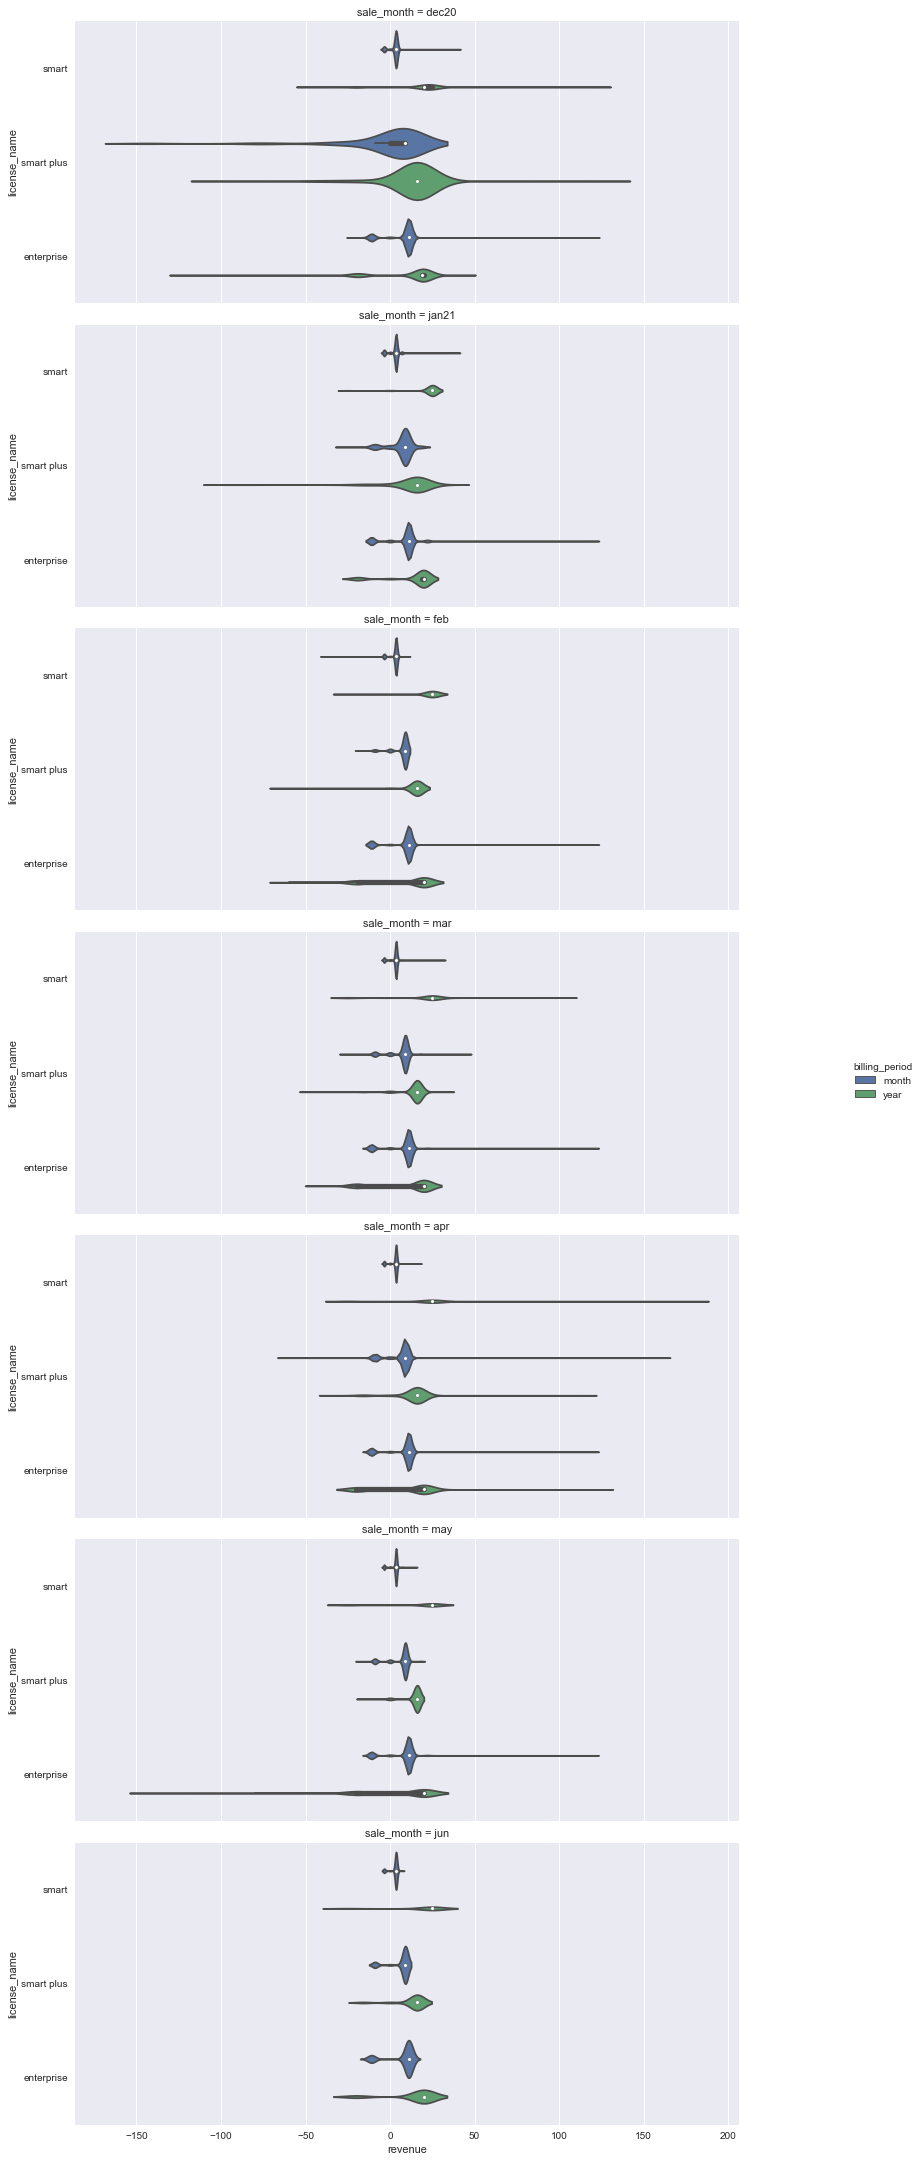

In [336]:
# f, ax = plt.subplots(figsize=(30,12))

g = sns.catplot(y= 'license_name', x = 'revenue',
            hue = 'billing_period', row = 'sale_month',
            kind = 'violin',
            data = customer) 
           
g.fig.set_size_inches(15,30)        

#plt.show()

### By license and billing period

The average of what a customer spends every month on subscriptions by license name and billing period.

In [339]:
customer.head()

,sale_year,sale_month,license_id,license_name,billing_period,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
0,2020,dec20,2971,smart,month,2,5,7.00,17.50,3,10.50
1,2020,dec20,2971,smart plus,month,2,2,17.98,17.98,0,0.00
2,2020,dec20,2975,enterprise,year,0,1,0.00,18.99,1,18.99
3,2020,dec20,2979,enterprise,month,0,1,0.00,10.99,1,10.99
4,2020,dec20,3012,enterprise,month,0,1,0.00,10.99,1,10.99


In [345]:
customer.shape

(39639, 11)

In [342]:
customer_l_b = customer.groupby(['license_id','license_name','billing_period']).agg({'revenue':'mean'})
customer_l_b.reset_index(inplace=True)
customer_l_b

,license_id,license_name,billing_period,revenue
0,2971,smart,month,8.000000
1,2971,smart,year,0.000000
2,2971,smart plus,month,5.993333
3,2975,enterprise,year,18.990000
4,2979,enterprise,month,3.663333
...,...,...,...,...
18166,76542,smart plus,month,8.990000
18167,76543,smart plus,month,8.990000
18168,76544,smart plus,month,8.990000
18169,76545,smart plus,month,8.990000


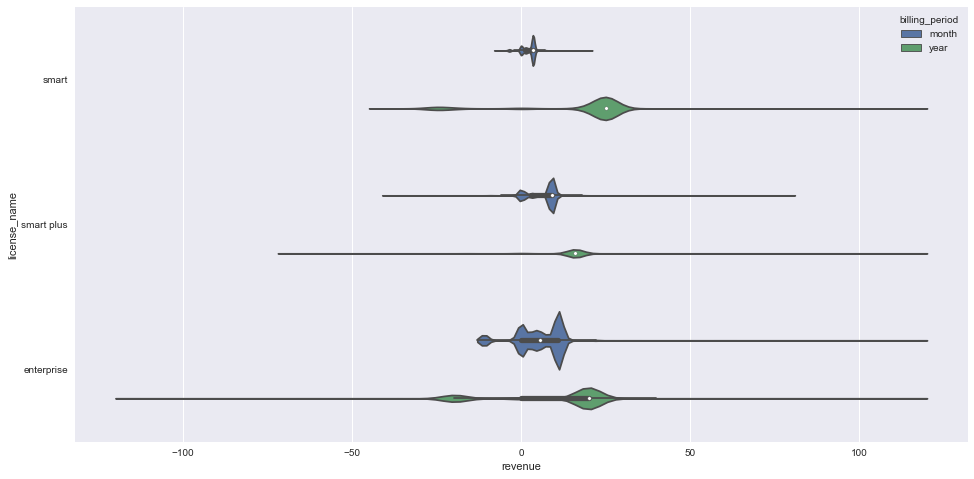

In [359]:
f, ax = plt.subplots(figsize=(16,8))

sns.violinplot(y = 'license_name', x = 'revenue',
               hue = 'billing_period', 
               data = customer_l_b,
               scale = 'count', scale_hue = False, cut = 0) #, dodge= True) #, inner='quartiles')

plt.show()

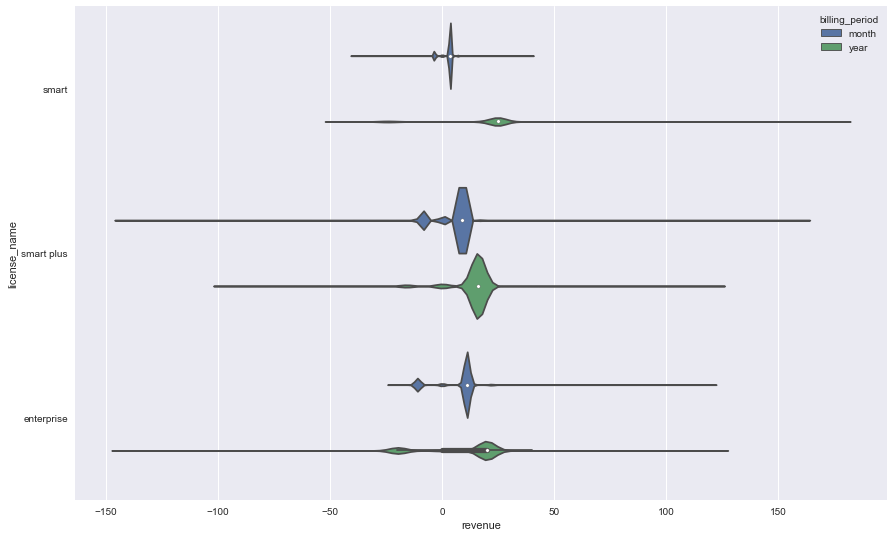

In [368]:

g = sns.catplot(y= 'license_name', x = 'revenue',
                hue = 'billing_period', 
                kind = 'violin',
                data = customer,
                legend_out = False) #,
            #height = 40, aspect = 4) 

g.fig.set_size_inches(15,8)        


## Purchases by months, license and billing period

In [348]:
customer_purch = subs[subs.operation_type == 'purchase'].pivot_table(values = 'billing_plan_price',
                                                                     index=['sale_year',
                                                                   'sale_month',
                                                                   'license_id',
                                                                   'license_name',
                                                                   'billing_period'],
                                                                     # columns = 'operation_type',
                                                                     aggfunc= ['count','sum'],
                                                                     fill_value = 0) #,

customer_purch.columns = ['n_purch', 'purch_amount'] # 'n_cancel', 'cancel_amount', 

#customer_purch['freq'] = customer_purch.n_purch-customer_purch.n_cancel
#customer_purch['revenue'] = customer_purch.purch_amount-customer_purch.cancel_amount

# customer_purch.reset_index(inplace=True)

customer_purch

n_purch  \
sale_year sale_month license_id license_name billing_period            
2020      12         2971       smart        month                 5   
                                smart plus   month                 2   
                     2975       enterprise   year                  1   
                     2979       enterprise   month                 1   
                     3012       enterprise   month                 1   
...                                                              ...   
2021      6          76542      smart plus   month                 1   
                     76543      smart plus   month                 1   
                     76544      smart plus   month                 1   
                     76545      smart plus   month                 1   
                     76549      smart        year                  1   

                                                             purch_amount  
sale_year sale_month license_id license_name billing_period                
2020      12         2971       smart        month                  17.50  
                                smart plus   month                  17.98  
                     2975       enterprise   year                   18.99  
                     2979       enterprise   month                  10.99  
                     3012       enterprise   month                  10.99  
...                                                                   ...  
2021      6          76542      smart plus   month                   8.99  
                     76543      smart plus   month                   8.99  
                     76544      smart plus   month                   8.99  
                     76545      smart plus   month                   8.99  
                     76549      smart        year                   25.00  

[34002 rows x 2 columns]

In [350]:
# Prepare the dataframe
cat_months(customer_purch)

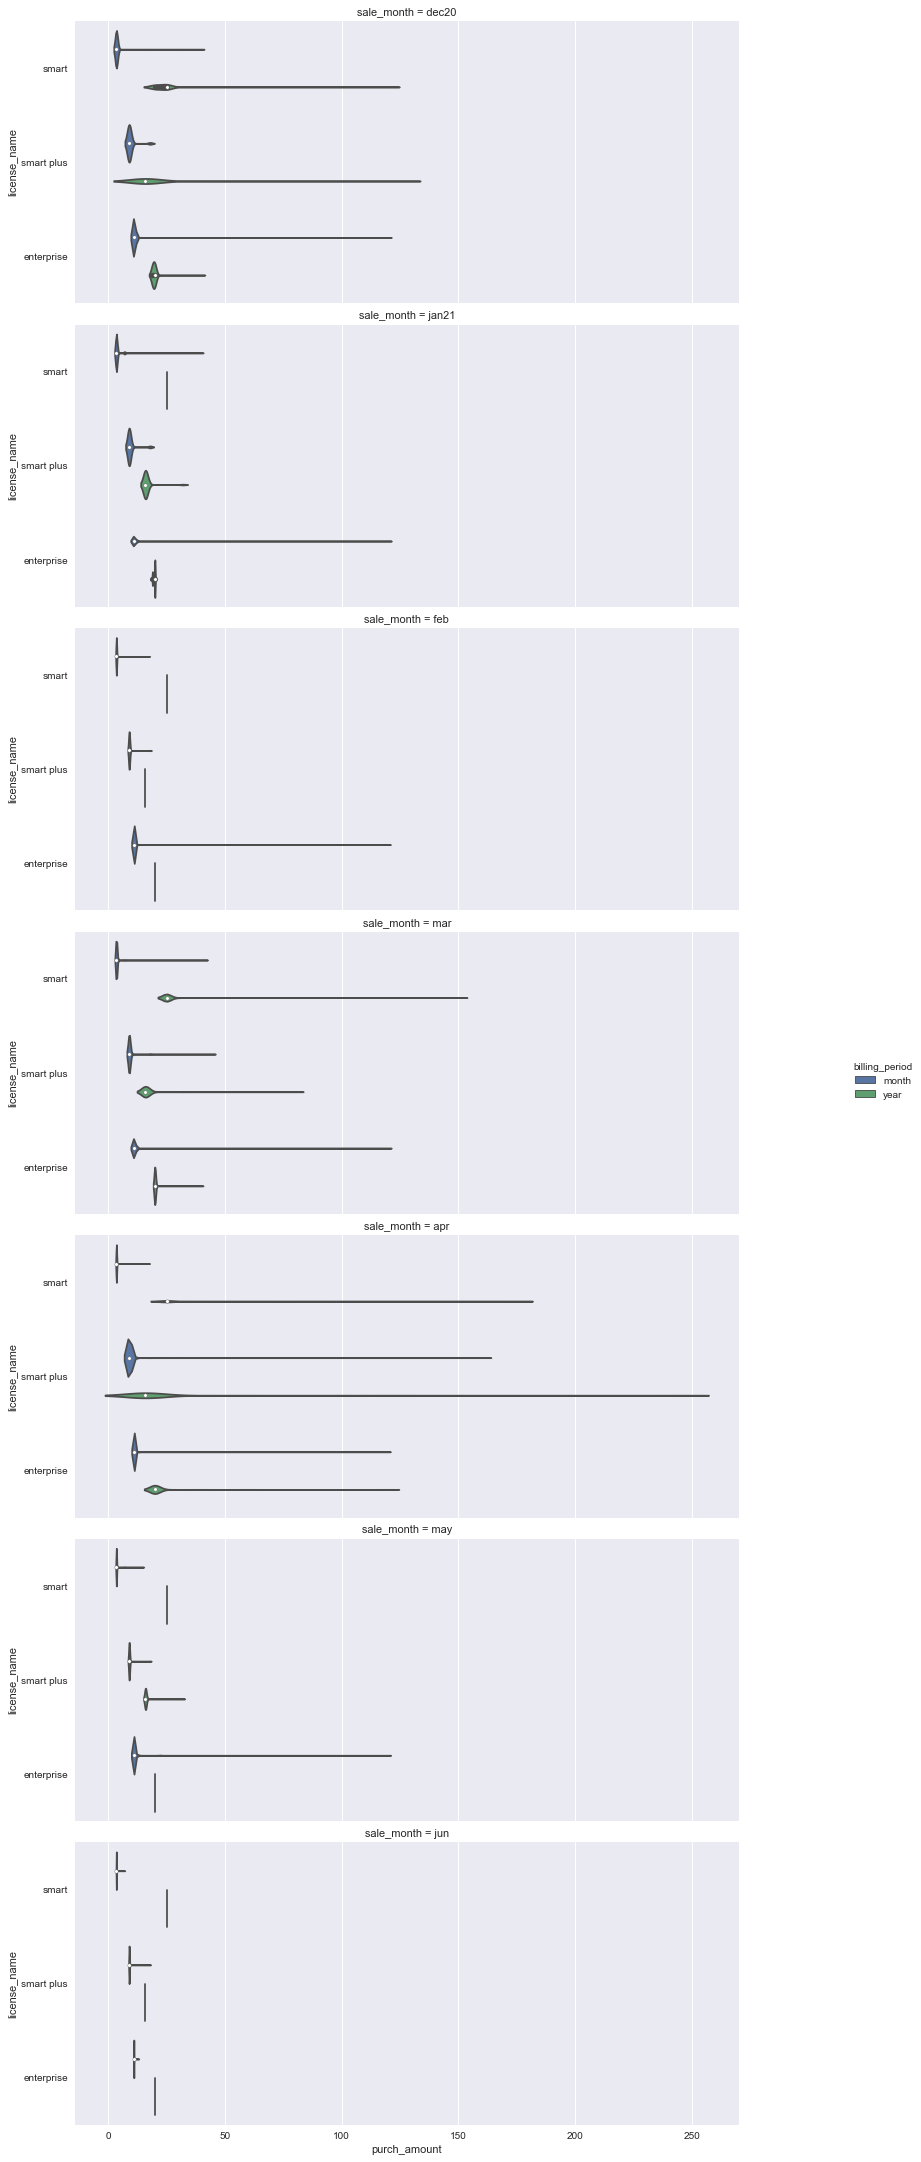

In [351]:
# f, ax = plt.subplots(figsize=(30,12))

g = sns.catplot(y= 'license_name', x = 'purch_amount',
            hue = 'billing_period', row = 'sale_month',
            kind = 'violin',
            data = customer_purch) 
           
g.fig.set_size_inches(15,30)        

#plt.show()

### By license and billing period

The average of what a customer purchases every month on subscriptions by license name and billing period.

In [352]:
customer_purch_l_b = customer.groupby(['license_id','license_name','billing_period']).agg({'purch_amount':'mean'})
customer_purch_l_b.reset_index(inplace=True)
customer_purch_l_b

,license_id,license_name,billing_period,purch_amount
0,2971,smart,month,9.000000
1,2971,smart,year,25.000000
2,2971,smart plus,month,11.986667
3,2975,enterprise,year,18.990000
4,2979,enterprise,month,7.326667
...,...,...,...,...
18166,76542,smart plus,month,8.990000
18167,76543,smart plus,month,8.990000
18168,76544,smart plus,month,8.990000
18169,76545,smart plus,month,8.990000


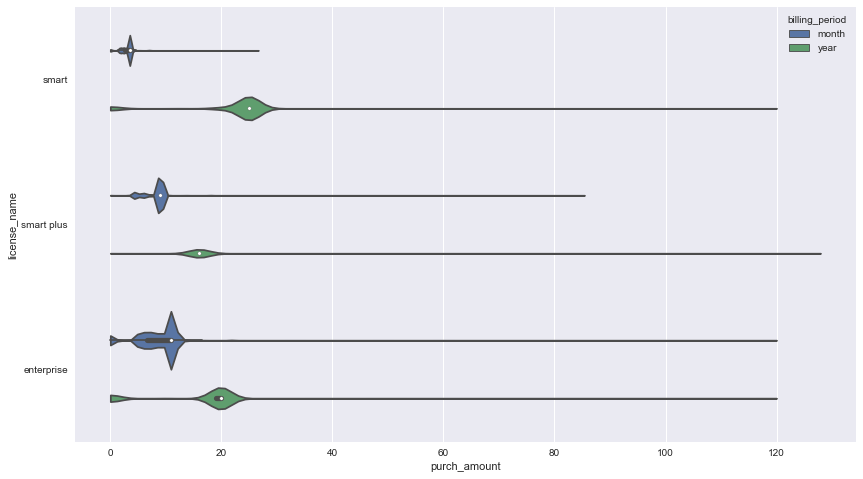

In [355]:
f, ax = plt.subplots(figsize=(14,8))

sns.violinplot(y = 'license_name', x = 'purch_amount',
               hue = 'billing_period', 
               data = customer_purch_l_b,
               scale = 'count', scale_hue = False, cut = 0) #, inner='stick')

plt.show()

### Majority of Purchases by license and billing period

In [365]:
# Compute the value purchased by the majority of the customers for every license name and billing period

majority = {'license':[], 'period':[], 'q80':[]}

for l in customer_purch_l_b.license_name.unique():
    for b in customer_purch_l_b.billing_period.unique():
        q = 0
        q = customer_purch_l_b[['purch_amount']][(customer_purch_l_b.license_name == l) & (customer_purch_l_b.billing_period == b)].quantile(0.8).values[0]
        
        majority['license'].append(l)
        majority['period'].append(b)
        majority['q80'].append(q)

majority = pd.DataFrame(majority)

majority

,license,period,q80
0,smart,month,3.50
1,smart,year,25.00
2,smart plus,month,8.99
3,smart plus,year,15.99
4,enterprise,month,10.99
5,enterprise,year,19.99


## extra: Initial Active Subscriptions

In [573]:
customer_revenue[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)]

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
4,3029,1.0,0.0,10.99,0.0,-1.0,-10.99
5,3050,1.0,0.0,19.99,0.0,-1.0,-19.99
8,3069,1.0,0.0,19.99,0.0,-1.0,-19.99
12,3083,1.0,0.0,18.99,0.0,-1.0,-18.99
36,3169,1.0,0.0,18.99,0.0,-1.0,-18.99
...,...,...,...,...,...,...,...
10922,58897,1.0,0.0,3.99,0.0,-1.0,-3.99
11862,62153,1.0,0.0,15.99,0.0,-1.0,-15.99
13268,66715,1.0,0.0,15.99,0.0,-1.0,-15.99
13656,67959,1.0,0.0,4.00,0.0,-1.0,-4.00


In [580]:
subscriptions0 = len(customer_revenue[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)])
subscriptions0

1359

In [574]:
customer_revenue.n_cancel[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)].value_counts()

1.0    1348
2.0       5
4.0       3
5.0       1
3.0       1
9.0       1
Name: n_cancel, dtype: int64

In [575]:
customer_revenue[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)].describe()

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
count,1359.000000,1359.000000,1359.0,1359.000000,1359.0,1359.000000,1359.000000
mean,24032.125828,1.020603,0.0,16.315548,0.0,-1.020603,-16.315548
std,15061.790568,0.291539,0.0,8.326441,0.0,0.291539,8.326441
min,3029.000000,1.000000,0.0,3.500000,0.0,-9.000000,-159.920000
25%,10574.500000,1.000000,0.0,10.990000,0.0,-1.000000,-19.990000
50%,20737.000000,1.000000,0.0,18.990000,0.0,-1.000000,-18.990000
75%,39203.500000,1.000000,0.0,19.990000,0.0,-1.000000,-10.990000
max,70428.000000,9.000000,0.0,159.920000,0.0,-1.000000,-3.500000


In [582]:
# Check the dynamics of the cancelations
subs[subs.license_id.isin(customer_revenue.license_id[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)])].sort_values('sale_date')



,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
44904,2020-12-13 09:27:00,47006,509,cancelation,month,enterprise,10.99,12,2020
34259,2020-12-13 23:00:00,38633,497,cancelation,month,enterprise,10.99,12,2020
37018,2020-12-13 23:00:00,33061,499,cancelation,month,enterprise,10.99,12,2020
45693,2020-12-13 23:00:00,33065,497,cancelation,month,enterprise,10.99,12,2020
42769,2020-12-13 23:00:00,42571,441,cancelation,month,smart,3.50,12,2020
...,...,...,...,...,...,...,...,...,...
25855,2021-06-03 22:02:00,24627,442,cancelation,year,smart,25.00,6,2021
45471,2021-06-04 22:01:00,24655,498,cancelation,year,enterprise,19.99,6,2021
18071,2021-06-05 22:02:00,24694,442,cancelation,year,smart,25.00,6,2021
44312,2021-06-05 22:02:00,22386,512,cancelation,year,enterprise,19.99,6,2021


In [583]:
# Doublecheck the operation_type of the cancelations 
subs.operation_type[subs.license_id.isin(customer_revenue.license_id[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)])].value_counts()



cancelation    1390
Name: operation_type, dtype: int64

In [ ]:
# ??? How can be cancelled a monthly subscription in june that has never been bought before?

In [584]:
subs[subs.license_id == 58509]

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
43459,2021-03-05 11:02:00,58509,521,cancelation,year,smart plus,15.99,3,2021
43460,2021-03-22 07:56:00,58509,475,cancelation,trial,trial smart,0.00,3,2021
43461,2021-04-18 08:09:00,58509,529,cancelation,month,smart,4.00,4,2021
43462,2021-05-27 14:44:00,58509,441,cancelation,month,smart,3.50,5,2021
43463,2021-06-06 09:11:00,58509,591,cancelation,month,enterprise,12.99,6,2021


In [585]:
# Check the billing perid of the cancelations
subs.billing_period[subs.license_id.isin(customer_revenue.license_id[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)])].value_counts()



year     764
month    623
trial      3
Name: billing_period, dtype: int64

# Explore the Packages - license_plan_id

## Prices by billing_period and license_name

In [ ]:
# Count the prices for every package

In [398]:
countPrice = subs[subs.billing_period != 'trial'].pivot_table(values = 'billing_plan_price',
                                                              index = ['license_name',
                                                                       'billing_period',
                                                                       'license_plan_id'],
                                                              aggfunc = pd.Series.nunique,
                                                              sort = True) #,

countPrice.reset_index(inplace = True)              
countPrice.columns = ['license', 'period', 'pack', 'n'] 

countPrice #.head(50)


,license,period,pack,n
0,enterprise,month,374,2
1,enterprise,month,384,1
2,enterprise,month,411,1
3,enterprise,month,438,1
4,enterprise,month,497,1
...,...,...,...,...
64,smart plus,year,522,1
65,smart plus,year,523,1
66,smart plus,year,524,1
67,smart plus,year,526,1


In [399]:
countPrice.n.value_counts()

1    59
2     7
3     2
4     1
Name: n, dtype: int64

In [402]:
# Unique Price Packages' List
uniPriceList = countPrice.pack[countPrice.n == 1].values.tolist()
uniPriceList.sort()
uniPriceList

[384,
 385,
 390,
 398,
 399,
 407,
 408,
 411,
 412,
 438,
 439,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 497,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 522,
 523,
 524,
 526,
 528,
 535,
 537,
 593,
 605]

In [403]:
# List of Packages with Linear Elastic Prices
linPriceList = countPrice.pack[countPrice.n == 2].values.tolist()
linPriceList.sort()
linPriceList

[374, 381, 435, 498, 521, 529, 591]

In [ ]:
# I will not work packages with more than two prices. Polynomial regression.

In [407]:
packages = subs[subs.billing_period != 'trial'].pivot_table(values = 'billing_plan_price',
                                                            index = ['license_name',
                                                                     'billing_period'],
                                                            columns = 'license_plan_id',
                                                            aggfunc = pd.Series.nunique,
                                                            # fill_value = 0,
                                                            margins = True,
                                                            sort = False) #,
                                                                       #'min',
                                                                       #'max',
                                                                       #'count',
                                                                       #'mean'])
# packages.columns = ['min','max', 'n','freq','mean']
packages.reset_index(inplace=True)
packages

license_plan_id,license_name,billing_period,370,371,374,375,381,384,385,390,398,399,407,408,411,412,435,438,439,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,526,528,529,535,537,591,593,605,All
0,enterprise,month,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,3
1,enterprise,year,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,smart plus,month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,smart plus,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2
4,smart,month,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,6
5,smart,year,NaN,4.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6,All,,3.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,16


In [385]:
packages[packages.license_name == 'enterprise']

license_plan_id,license_name,billing_period,370,371,374,375,381,384,385,390,398,399,407,408,411,412,435,438,439,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,526,528,529,535,537,591,593,605,All
0,enterprise,month,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,3
1,enterprise,year,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [758]:
packages = subs[subs.billing_period != 'trial'].pivot_table(values = 'billing_plan_price',
                                                            index = ['license_name',
                                                                     'billing_period', 
                                                                     'license_plan_id'],
                                                            aggfunc = ['min',
                                                                       'max',
                                                                       pd.Series.nunique,
                                                                       'count',
                                                                       'mean'])

# packages.columns = ['min','max', 'n','freq','mean']

# packages #.head(50)


min     max  n   freq  \
billing_period license_name license_plan_id                            
month          enterprise   374              10.99  120.00  2    168   
                            384              10.99   10.99  1     15   
                            411              10.99   10.99  1      5   
                            438              10.99   10.99  1     10   
                            497              10.99   10.99  1  16097   
...                                            ...     ... ..    ...   
year           smart plus   522              15.99   15.99  1     40   
                            523              15.99   15.99  1     91   
                            524              15.99   15.99  1     13   
                            526              15.99   15.99  1      5   
                            528              15.99   15.99  1     60   

                                                  mean  
billing_period license_name license_plan_id             
month          enterprise   374              12.936607  
                            384              10.990000  
                            411              10.990000  
                            438              10.990000  
                            497              10.990000  
...                                                ...  
year           smart plus   522              15.990000  
                            523              15.990000  
                            524              15.990000  
                            526              15.990000  
                            528              15.990000  

[69 rows x 5 columns]

In [759]:
packages.n.value_counts()

1    59
2     7
3     2
4     1
Name: n, dtype: int64

By definition a package id should not have several prices.

In [760]:
packages[packages.n > 1]

min    max  n  freq       mean
billing_period license_name license_plan_id                                  
month          enterprise   374              10.99  120.0  2   168  12.936607
                            591              12.99  120.0  2   124  15.578952
               smart        370               3.99   40.0  3    33   7.628182
                            529               4.00   15.0  2    23   5.434783
year           enterprise   375              18.99  120.0  3   333  19.671892
                            498              19.99  120.0  2  1682  20.049459
               smart        371              20.00  120.0  4   203  21.403941
                            381              20.00   45.0  2    16  21.562500
                            435              20.00   40.0  2    21  20.952381
               smart plus   521              15.99  120.0  2   765  16.125961

In [608]:
subs[subs.license_plan_id == 370].sort_values(['license_id','sale_date'])

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
42438,2020-12-14 18:02:00,3264,370,purchase,month,smart,3.99,12,2020
42439,2021-01-11 19:02:00,3264,370,purchase,month,smart,3.99,1,2021
42440,2021-02-11 19:02:00,3264,370,purchase,month,smart,3.99,2,2021
35758,2020-12-15 19:00:00,3490,370,purchase,month,smart,3.99,12,2020
35759,2021-01-12 20:00:00,3490,370,purchase,month,smart,3.99,1,2021
35760,2021-02-12 20:00:00,3490,370,purchase,month,smart,3.99,2,2021
43449,2020-12-16 13:01:00,3620,370,purchase,month,smart,3.99,12,2020
43450,2021-01-13 14:01:00,3620,370,purchase,month,smart,3.99,1,2021
43451,2021-02-13 14:02:00,3620,370,purchase,month,smart,3.99,2,2021
18,2020-12-16 13:00:00,3655,370,purchase,month,smart,8.00,12,2020


In [761]:
packages[packages.n == 1]

min    max  n   freq   mean
billing_period license_name license_plan_id                               
month          enterprise   384              10.99  10.99  1     15  10.99
                            411              10.99  10.99  1      5  10.99
                            438              10.99  10.99  1     10  10.99
                            497              10.99  10.99  1  16097  10.99
                            499              10.99  10.99  1   1115  10.99
                            501              10.99  10.99  1     96  10.99
                            503              10.99  10.99  1     82  10.99
                            505              10.99  10.99  1    495  10.99
                            507              10.99  10.99  1    142  10.99
                            509              10.99  10.99  1    175  10.99
                            511              10.99  10.99  1   1115  10.99
                            593              12.99  12.99  1     12  12.99
                            605              12.99  12.99  1      4  12.99
               smart        398               3.99   3.99  1      3   3.99
                            407               3.99   3.99  1      3   3.99
                            441               3.50   3.50  1   7958   3.50
                            443               3.50   3.50  1    375   3.50
                            445               3.50   3.50  1     39   3.50
                            447               3.50   3.50  1     60   3.50
                            449               3.50   3.50  1    106   3.50
                            451               3.50   3.50  1     58   3.50
                            453               3.50   3.50  1    103   3.50
                            455               3.50   3.50  1    562   3.50
                            535               4.00   4.00  1      3   4.00
                            537               4.00   4.00  1      3   4.00
               smart plus   513               8.99   8.99  1   5976   8.99
                            514               8.99   8.99  1    334   8.99
                            515               8.99   8.99  1    435   8.99
                            516               8.99   8.99  1     64   8.99
                            517               8.99   8.99  1     36   8.99
                            518               8.99   8.99  1    128   8.99
                            519               8.99   8.99  1     82   8.99
                            520               8.99   8.99  1    133   8.99
year           enterprise   385              18.99  18.99  1     25  18.99
                            412              18.99  18.99  1      1  18.99
                            439              18.99  18.99  1     47  18.99
                            500              19.99  19.99  1     87  19.99
                            502              19.99  19.99  1      4  19.99
                            504              19.99  19.99  1      4  19.99
                            506              19.99  19.99  1      9  19.99
                            508              19.99  19.99  1      5  19.99
                            510              19.99  19.99  1     24  19.99
                            512              19.99  19.99  1    150  19.99
               smart        390              20.00  20.00  1      1  20.00
                            399              20.00  20.00  1      1  20.00
                            408              20.00  20.00  1      1  20.00
                            442              25.00  25.00  1   1869  25.00
                            444              25.00  25.00  1    150  25.00
                            446              25.00  25.00  1      3  25.00
                            448              25.00  25.00  1      3  25.00
                            450              25.00  25.00  1     10  25.00
                            452              25.00  25.00  1      7  25.

In [765]:
# Immutable prices
price = packages[['min']][packages.n == 1]
price.columns = ['rate']
price.reset_index(inplace=True)
price


,billing_period,license_name,license_plan_id,rate
0,month,enterprise,384,10.99
1,month,enterprise,411,10.99
2,month,enterprise,438,10.99
3,month,enterprise,497,10.99
4,month,enterprise,499,10.99
5,month,enterprise,501,10.99
6,month,enterprise,503,10.99
7,month,enterprise,505,10.99
8,month,enterprise,507,10.99
9,month,enterprise,509,10.99


In [767]:
price_month = price.iloc[:,1:][price.billing_period == 'month']
price_month

,license_name,license_plan_id,rate
0,enterprise,384,10.99
1,enterprise,411,10.99
2,enterprise,438,10.99
3,enterprise,497,10.99
4,enterprise,499,10.99
5,enterprise,501,10.99
6,enterprise,503,10.99
7,enterprise,505,10.99
8,enterprise,507,10.99
9,enterprise,509,10.99


In [768]:
price_year = price.iloc[:,1:][price.billing_period == 'year']
price_year

,license_name,license_plan_id,rate
33,enterprise,385,18.99
34,enterprise,412,18.99
35,enterprise,439,18.99
36,enterprise,500,19.99
37,enterprise,502,19.99
38,enterprise,504,19.99
39,enterprise,506,19.99
40,enterprise,508,19.99
41,enterprise,510,19.99
42,enterprise,512,19.99


In [770]:
# Frequency table of the monthly subscriptions
pd.crosstab(index = price_month.rate, 
            columns = price_month.license_name,
            values = price_month.license_plan_id,
            aggfunc = 'count').fillna(0)

license_name,enterprise,smart,smart plus
rate,,,
3.50,0.0,8.0,0.0
3.99,0.0,2.0,0.0
4.00,0.0,2.0,0.0
8.99,0.0,0.0,8.0
10.99,11.0,0.0,0.0
12.99,2.0,0.0,0.0


In [771]:
# Frequency table of the yearly subscriptions
pd.crosstab(index = price_year.rate, 
            columns = price_year.license_name,
            values = price_year.license_plan_id,
            aggfunc = 'count').fillna(0)

license_name,enterprise,smart,smart plus
rate,,,
15.99,0.0,0.0,5.0
18.99,3.0,0.0,0.0
19.99,7.0,0.0,0.0
20.00,0.0,3.0,0.0
25.00,0.0,8.0,0.0


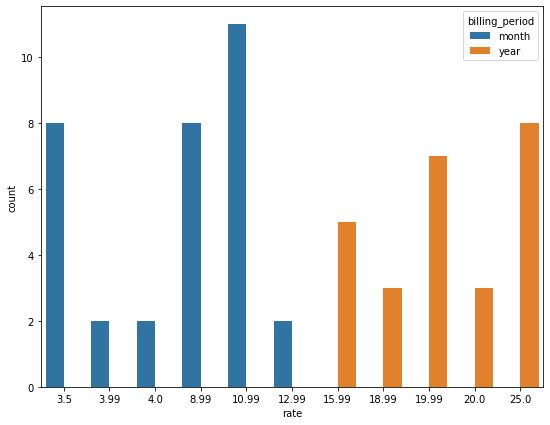

In [776]:
f, ax = plt.subplots(figsize=(9,7))
sns.countplot(x='rate', hue='billing_period', data=price)
plt.show()

## with several prices

In [670]:

packages[packages.n > 1].reset_index() #.license_plan_id

0    370
1    371
2    374
3    375
4    381
5    435
6    498
7    521
8    529
9    591
Name: license_plan_id, dtype: int64

In [673]:
elastic_pack = packages[packages.n > 1].reset_index().license_plan_id.to_list()
elastic_pack

[370, 371, 374, 375, 381, 435, 498, 521, 529, 591]

In [676]:
subs[subs.license_plan_id == 370].sort_values(['license_id','sale_date'])

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
42438,2020-12-14 18:02:00,3264,370,purchase,month,smart,3.99,12,2020
42439,2021-01-11 19:02:00,3264,370,purchase,month,smart,3.99,1,2021
42440,2021-02-11 19:02:00,3264,370,purchase,month,smart,3.99,2,2021
35758,2020-12-15 19:00:00,3490,370,purchase,month,smart,3.99,12,2020
35759,2021-01-12 20:00:00,3490,370,purchase,month,smart,3.99,1,2021
35760,2021-02-12 20:00:00,3490,370,purchase,month,smart,3.99,2,2021
43449,2020-12-16 13:01:00,3620,370,purchase,month,smart,3.99,12,2020
43450,2021-01-13 14:01:00,3620,370,purchase,month,smart,3.99,1,2021
43451,2021-02-13 14:02:00,3620,370,purchase,month,smart,3.99,2,2021
18,2020-12-16 13:00:00,3655,370,purchase,month,smart,8.00,12,2020


In [691]:
packages_elastic_m = subs[subs.license_plan_id.isin(elastic_pack)].pivot_table(index = ['billing_period',
                                                                                      'license_plan_id',
                                                                                      'billing_plan_price',
                                                                                      'sale_year',
                                                                                      'sale_month'],
                                                                             columns = 'operation_type',
                                                                             aggfunc = {'license_id':pd.Series.nunique,
                                                                                        'billing_plan_price':['count','sum']},
                                                                             fill_value = 0)

packages_elastic_m.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

packages_elastic_m['freq'] = packages_elastic_m.n_purch-packages_elastic_m.n_cancel
packages_elastic_m['revenue'] = packages_elastic_m.purch_amount-packages_elastic_m.cancel_amount

# packages_elastic_m.reset_index(inplace=True)

packages_elastic_m.head(35)


n_cancel  \
billing_period license_plan_id billing_plan_price sale_year sale_month             
month          370             3.99               2020      12                 2   
                                                  2021      1                  2   
                                                            2                  1   
                                                            3                  0   
                                                            4                  2   
                                                            5                  1   
                               8.00               2020      12                 0   
                                                  2021      1                  0   
                                                            2                  0   
                               40.00              2020      12                 0   
                                                  2021      1                  0   
                                                            2                  1   
               374             10.99              2020      12                 2   
                                                  2021      1                  7   
                                                            2                  5   
                                                            3                  0   
                               120.00             2020      12                 0   
                                                  2021      1                  0   
                                                            2                  0   
               529             4.00               2021      2                  1   
                                                            3                  1   
                                                            4                  4   
                                                            5                  1   
                                                            6                  0   
                               15.00              2021      3                  0   
                                                            4                  0   
                                                            5                  0   
               591             12.99              2021      3                  4   
                                                            4                  2   
                                                            5                  2   
                                                            6                  1   
                               120.00             2021      3                  0   
                                                            4                  0   
                                                            5                  0   
year           371             20.00              2020      12                59   

                                                                        n_purch  \
billing_period license_plan_id billing_plan_price sale_year sale_month            
month          370             3.99               2020      12                6   
                                                  2021      1                 6   
                                                            2                 6   
                                                            3                 1   
                                                            4                 0   
                                                            5                 0   
                               8.00               2020      12                1   
                                                  2021      1                 1   
                                                            2                 1   
                               40.00              

In [692]:
packages_elastic = subs[subs.license_plan_id.isin(elastic_pack)].pivot_table(index = ['billing_period',
                                                                                      'license_plan_id',
                                                                                      'billing_plan_price'],
                                                                                      #'sale_year',
                                                                                      #'sale_month'],
                                                                             columns = 'operation_type',
                                                                             aggfunc = {'license_id':pd.Series.nunique,
                                                                                        'billing_plan_price':['count','sum']},
                                                                             fill_value = 0)

packages_elastic.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

packages_elastic['freq'] = packages_elastic.n_purch-packages_elastic.n_cancel
packages_elastic['revenue'] = packages_elastic.purch_amount-packages_elastic.cancel_amount

# packages_elastic.reset_index(inplace=True)

packages_elastic #.head(35)


n_cancel  n_purch  \
billing_period license_plan_id billing_plan_price                      
month          370             3.99                       8       19   
                               8.00                       0        3   
                               40.00                      1        2   
               374             10.99                     14      151   
                               120.00                     0        3   
               529             4.00                       7       13   
                               15.00                      0        3   
               591             12.99                      9      112   
                               120.00                     0        3   
year           371             20.00                     61      136   
                               40.00                      1        2   
                               45.00                      0        1   
                               120.00                     0        2   
               375             18.99                    111      215   
                               40.00                      3        3   
                               120.00                     1        0   
               381             20.00                      5       10   
                               45.00                      1        0   
               435             20.00                      7       13   
                               40.00                      1        0   
               498             19.99                    395     1286   
                               120.00                     0        1   
               521             15.99                     98      666   
                               120.00                     0        1   

                                                   cancel_amount  \
billing_period license_plan_id billing_plan_price                  
month          370             3.99                        31.92   
                               8.00                         0.00   
                               40.00                       40.00   
               374             10.99                      153.86   
                               120.00                       0.00   
               529             4.00                        28.00   
                               15.00                        0.00   
               591             12.99                      116.91   
                               120.00                       0.00   
year           371             20.00                     1220.00   
                               40.00                       40.00   
                               45.00                        0.00   
                               120.00                       0.00   
               375             18.99                     2107.89   
                               40.00                      120.00   
                               120.00                     120.00   
               381             20.00                      100.00   
                               45.00                       45.00   
               435             20.00                      140.00   
                               40.00                       40.00   
               498             19.99                     7896.05   
                               120.00                       0.00   
               521             15.99                     1567.02   
                               120.00                       0.00   

                                                   purch_amount  cancel_cust  \
billing_period license_plan_id billing_plan_price                              
month          370             3.99                       75.81            8   
                               8.00                       24.00            0   
                               40.00                      80.00            1   
         

In [ ]:
# In order to simplify I will analyze just 374 license_plan_id supposing both prices last the same time

In [695]:
packages_elastic.reset_index(inplace = True) #level=['license_plan_id','billing_plan_price'], 
packages_elastic

,billing_period,license_plan_id,billing_plan_price,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,month,370,3.99,8,19,31.92,75.81,8,7,11,43.89
1,month,370,8.00,0,3,0.00,24.00,0,1,3,24.00
2,month,370,40.00,1,2,40.00,80.00,1,1,1,40.00
3,month,374,10.99,14,151,153.86,1659.49,13,55,137,1505.63
4,month,374,120.00,0,3,0.00,360.00,0,1,3,360.00
5,month,529,4.00,7,13,28.00,52.00,7,5,6,24.00
6,month,529,15.00,0,3,0.00,45.00,0,1,3,45.00
7,month,591,12.99,9,112,116.91,1454.88,9,40,103,1337.97
8,month,591,120.00,0,3,0.00,360.00,0,1,3,360.00
9,year,371,20.00,61,136,1220.00,2720.00,61,136,75,1500.00


In [696]:
packs_e374 = packages_elastic[packages_elastic.license_plan_id == 374]
packs_e374

,billing_period,license_plan_id,billing_plan_price,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
3,month,374,10.99,14,151,153.86,1659.49,13,55,137,1505.63
4,month,374,120.00,0,3,0.00,360.00,0,1,3,360.00


In [704]:
packs_e374[['billing_plan_price','freq']]

,billing_plan_price,freq
3,10.99,137
4,120.00,3


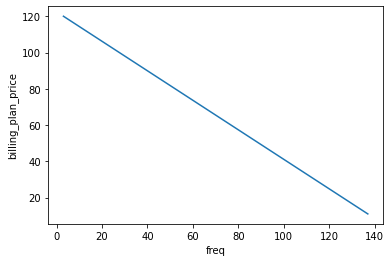

In [708]:
sns.lineplot(x='freq', y='billing_plan_price', data=packs_e374);

In [700]:
# Price Elasticity of Demand --> PED

percent_iQd = (packs_e374.freq[3]-packs_e374.freq[4])/packs_e374.freq[4]
percent_iP = (packs_e374.billing_plan_price[3]-packs_e374.billing_plan_price[4])/packs_e374.billing_plan_price[4]

ped374 = percent_iQd/percent_iP

ped374


-49.169800935693964

In [ ]:
# ped374 --> Elastic Demand

In [ ]:
# Price Optimization


In [ ]:
# Price Curve

# P = P0 + (bP)Q

# bP = iP/iQd

In [701]:
# Demand Curve
# Qd = Q0 + (bQ)P

# bQ = iQd/iP --> bQ = (Q2-Q1)/(P2-P1)

iQd = packs_e374.freq[3]-packs_e374.freq[4]
iP = packs_e374.billing_plan_price[3]-packs_e374.billing_plan_price[4]

bQ = iQd/iP

bQ


-1.2292450233923493

In [709]:
# 137 = Q0 + bQ*10.99
# 3 = Q0 + bQ*120

# 140 = 2*Q0 + 130.99*bQ --> Q0 = (140 - 130.99*bQ)/2 --> Q0 = [(Q2+Q1)-(P2+P1)*bQ]/2

Q0 = (140 - 130.99 * bQ)/2

Q0

150.50940280708193

In [711]:
# Price Curve

# P = 1/bQ * Qd - Q0/bQ

# P0 = -Q0/bQ

P0 = -1*Q0/bQ

P0

122.4405223880597

In [712]:
# Revenue PQ

# PQ = P * (Q0 + (bQ)P) --> PQ = (bQ)P**2 + Q0*P

# PQ Max:

# 2*(bQ)Po + Q0 = 0 --> Po = - Q0/(2*bQ) --> Po = P0/2

Po = -1*Q0/(2*bQ)

Po

61.22026119402985

Accordingly to the linear Price Elasticity of Demand and its Price Optimization the rate of package 374 should be increased up to 61.22 in order to get the maximum revenue.

## by sales

In [448]:
# Group
packages_sales = subs[subs.billing_period != 'trial'].groupby(['license_name',
                                                               'license_plan_id',
                                                               'operation_type']).agg({'billing_plan_price':['count','sum']})

packages_sales.columns =['n','amount']

packages_sales.reset_index(inplace=True)

packages_sales


,license_name,license_plan_id,operation_type,n,amount
0,enterprise,374,cancelation,14,153.86
1,enterprise,374,purchase,154,2019.49
2,enterprise,375,cancelation,115,2347.89
3,enterprise,375,purchase,218,4202.85
4,enterprise,384,cancelation,1,10.99
...,...,...,...,...,...
122,smart plus,524,cancelation,6,95.94
123,smart plus,524,purchase,7,111.93
124,smart plus,526,purchase,5,79.95
125,smart plus,528,cancelation,25,399.75


In [453]:
# Pivot
packages_sales = packages_sales.pivot(index=['license_name','license_plan_id'], 
                                      columns='operation_type', 
                                      values = ['n','amount'])

packages_sales.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount']

packages_sales.reset_index(inplace=True)

packages_sales


,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount
0,enterprise,374,14.0,154.0,153.86,2019.49
1,enterprise,375,115.0,218.0,2347.89,4202.85
2,enterprise,384,1.0,14.0,10.99,153.86
3,enterprise,385,19.0,6.0,360.81,113.94
4,enterprise,411,2.0,3.0,21.98,32.97
...,...,...,...,...,...,...
64,smart plus,522,5.0,35.0,79.95,559.65
65,smart plus,523,4.0,87.0,63.96,1391.13
66,smart plus,524,6.0,7.0,95.94,111.93
67,smart plus,526,NaN,5.0,NaN,79.95


In [454]:
packages_sales.fillna(0, inplace=True)
packages_sales['freq'] = packages_sales.n_purch-packages_sales.n_cancel
packages_sales['revenue'] = packages_sales.purch_amount-packages_sales.cancel_amount
packages_sales

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
0,enterprise,374,14.0,154.0,153.86,2019.49,140.0,1865.63
1,enterprise,375,115.0,218.0,2347.89,4202.85,103.0,1854.96
2,enterprise,384,1.0,14.0,10.99,153.86,13.0,142.87
3,enterprise,385,19.0,6.0,360.81,113.94,-13.0,-246.87
4,enterprise,411,2.0,3.0,21.98,32.97,1.0,10.99
...,...,...,...,...,...,...,...,...
64,smart plus,522,5.0,35.0,79.95,559.65,30.0,479.70
65,smart plus,523,4.0,87.0,63.96,1391.13,83.0,1327.17
66,smart plus,524,6.0,7.0,95.94,111.93,1.0,15.99
67,smart plus,526,0.0,5.0,0.00,79.95,5.0,79.95


In [586]:
packages_sales = pd.merge(packages_sales, price, how='left', on='license_plan_id')
packages_sales #.sort_values('n_purch', ascending = False)

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue,rate_x,rate_y
8,enterprise,497,2915.0,13182.0,32035.85,144870.18,10267.0,112834.33,10.99,10.99
36,smart,441,1140.0,6818.0,3990.00,23863.00,5678.0,19873.00,3.50,3.50
55,smart plus,513,1093.0,4883.0,9826.07,43898.17,3790.0,34072.10,8.99,8.99
37,smart,442,230.0,1639.0,5750.00,40975.00,1409.0,35225.00,25.00,25.00
9,enterprise,498,395.0,1287.0,7896.05,25827.14,892.0,17931.09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13,enterprise,502,3.0,1.0,59.97,19.99,-2.0,-39.98,19.99,19.99
30,smart,390,0.0,1.0,0.00,20.00,1.0,20.00,20.00,20.00
32,smart,399,0.0,1.0,0.00,20.00,1.0,20.00,20.00,20.00
34,smart,408,0.0,1.0,0.00,20.00,1.0,20.00,20.00,20.00


In [591]:
packages_sales.sort_values('freq', ascending = False) #.head(40)

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue,rate
8,enterprise,497,2915.0,13182.0,32035.85,144870.18,10267.0,112834.33,10.99
36,smart,441,1140.0,6818.0,3990.00,23863.00,5678.0,19873.00,3.50
55,smart plus,513,1093.0,4883.0,9826.07,43898.17,3790.0,34072.10,8.99
37,smart,442,230.0,1639.0,5750.00,40975.00,1409.0,35225.00,25.00
9,enterprise,498,395.0,1287.0,7896.05,25827.14,892.0,17931.09,NaN
...,...,...,...,...,...,...,...,...,...
41,smart,446,1.0,2.0,25.00,50.00,1.0,25.00,25.00
5,enterprise,412,1.0,0.0,18.99,0.00,-1.0,-18.99,18.99
13,enterprise,502,3.0,1.0,59.97,19.99,-2.0,-39.98,19.99
11,enterprise,500,47.0,40.0,939.53,799.60,-7.0,-139.93,19.99


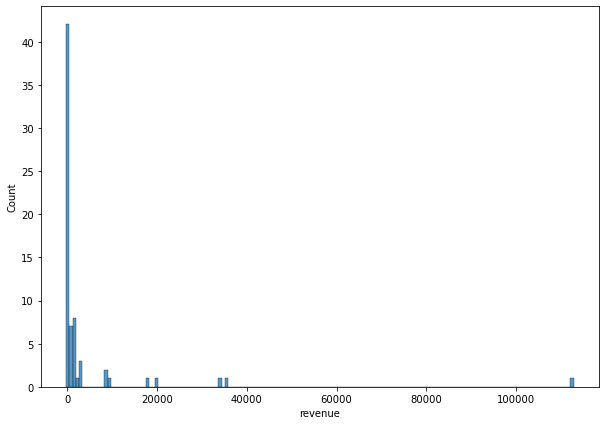

In [635]:
f, ax = plt.subplots(figsize=(10,7))
sns.histplot(data = packages_sales, x='revenue') #, kde=True)
plt.show()

In [ ]:
"""
for x in quantiles[1][1:]:
    plt.axvline(x, color = 'orange', linewidth=0.5)
sns.histplot(data = customers, x='expend') #, kde=True)
plt.show()
"""

In [457]:
# Average Purchased Package Fee
packages_sales.revenue.sum()/packages_sales.freq.sum()

10.21846182058241

In [465]:
packages_sales.rate #.isna().sum()

nan


## by license

In [ ]:
packages_license = pd.crosstab(subs[(subs.billing_period != 'trial') & (subs[subs.operation_type == 'purchase'])])


In [443]:
# packages_license = pd.crosstab([subs.license_name, subs.sale_year, subs.sale_month], subs.license_plan_id)
packages_license = pd.crosstab(subs.license_name, subs.license_plan_id)
packages_license

license_plan_id,370,371,374,375,377,381,384,385,390,398,399,407,408,411,412,435,438,439,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,475,478,481,484,487,490,493,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,526,528,529,535,537,591,593,605
license_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
enterprise,0,0,168,333,0,0,15,25,0,0,0,0,0,5,1,0,10,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16097,1682,1115,87,96,4,82,4,495,9,142,5,175,24,1115,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,12,4
smart,33,203,0,0,0,16,0,0,1,3,1,3,1,0,0,21,0,0,7958,1869,375,150,39,3,60,3,106,10,58,7,103,33,562,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,3,3,0,0,0
smart plus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5976,334,435,64,36,128,82,133,765,40,91,13,5,60,0,0,0,0,0,0
trial smart,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3398,109,62,26,90,59,96,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Every license_plan_id is exclusive of its license_name

In [652]:
packages_sales

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue,rate
0,enterprise,374,14.0,154.0,153.86,2019.49,140.0,1865.63,NaN
1,enterprise,375,115.0,218.0,2347.89,4202.85,103.0,1854.96,NaN
2,enterprise,384,1.0,14.0,10.99,153.86,13.0,142.87,10.99
3,enterprise,385,19.0,6.0,360.81,113.94,-13.0,-246.87,18.99
4,enterprise,411,2.0,3.0,21.98,32.97,1.0,10.99,10.99
...,...,...,...,...,...,...,...,...,...
64,smart plus,522,5.0,35.0,79.95,559.65,30.0,479.70,15.99
65,smart plus,523,4.0,87.0,63.96,1391.13,83.0,1327.17,15.99
66,smart plus,524,6.0,7.0,95.94,111.93,1.0,15.99,15.99
67,smart plus,526,0.0,5.0,0.00,79.95,5.0,79.95,15.99


In [654]:
packages_sales.groupby('license_name').agg({'rate':[pd.Series.nunique,'count','mean','median','sum']})

rate                                
             nunique count       mean median     sum
license_name                                        
enterprise         4    23  14.946522  12.99  343.77
smart              5    23  13.216522   4.00  303.98
smart plus         2    13  11.682308   8.99  151.87

In [660]:
packages_l_bp = subs[subs.billing_period != 'trial'].pivot_table(values=['license_plan_id',
                                                                         'billing_plan_price'],
                                                                index = 'license_name',
                                                                         #'license_plan_id',
                                                                         #'operation_type'],
                                                                columns = ['billing_period'],
                                                                aggfunc = {'license_plan_id':pd.Series.nunique,
                                                                           'billing_plan_price': [pd.Series.nunique,
                                                                                                  'count',
                                                                                                  'min',
                                                                                                  'mean',
                                                                                                  'median',
                                                                                                  'max',
                                                                                                  'sum']})

packages_l_bp
                                                                    

billing_plan_price                                             \
                            count           max              mean              
billing_period              month  year   month   year      month       year   
license_name                                                                   
enterprise                  19655  2371  120.00  120.0  11.037218  19.956714   
smart                        9329  2495   40.00  120.0   3.520010  24.645291   
smart plus                   7188   974    8.99  120.0   8.990000  16.096786   

                                                                              \
               median           min        nunique             sum             
billing_period  month   year  month   year   month year      month      year   
license_name                                                                   
enterprise      10.99  19.99  10.99  18.99       3    4  216936.51  47317.37   
smart            3.50  25.00   3.50  20.00       6    5   32838.17  61490.00   
smart plus       8.99  15.99   8.99  15.99       1    2   64620.12  15678.27   

               license_plan_id       
                       nunique       
billing_period           month year  
license_name                         
enterprise                  15   12  
smart                       14   14  
smart plus                   8    6

## by billing period

In [ ]:
# Check if the same package could be sold both month and year

In [612]:
pack_period_xt = pd.crosstab(subs.license_plan_id[subs.billing_period != 'trial'],
                             subs.billing_period[subs.billing_period != 'trial'], 
                             values = 'license_plan_id',
                             aggfunc = pd.Series.nunique,
                             margins = True)

#pack_period_xt.fillna(0, inplace = T)

pack_period_xt


billing_period,month,year,All
license_plan_id,,,
370,1.0,NaN,1
371,NaN,1.0,1
374,1.0,NaN,1
375,NaN,1.0,1
381,NaN,1.0,1
...,...,...,...
537,1.0,NaN,1
591,1.0,NaN,1
593,1.0,NaN,1


In [613]:
pack_period_xt.columns

Index(['month', 'year', 'All'], dtype='object', name='billing_period')

In [614]:
pack_period_xt[pack_period_xt.All > 1]

billing_period,month,year,All
license_plan_id,,,


In [ ]:
# Month packages

In [617]:
month_packs = subs.license_plan_id[subs.billing_period == 'month'].sort_values().unique()
month_packs

array([370, 374, 384, 398, 407, 411, 438, 441, 443, 445, 447, 449, 451,
       453, 455, 497, 499, 501, 503, 505, 507, 509, 511, 513, 514, 515,
       516, 517, 518, 519, 520, 529, 535, 537, 591, 593, 605])

In [618]:
len(month_packs)

37

In [ ]:
# year packages

In [619]:
year_packs = subs.license_plan_id[subs.billing_period == 'year'].sort_values().unique()
year_packs

array([371, 375, 381, 385, 390, 399, 408, 412, 435, 439, 442, 444, 446,
       448, 450, 452, 454, 456, 498, 500, 502, 504, 506, 508, 510, 512,
       521, 522, 523, 524, 526, 528])

In [620]:
len(year_packs)

32

### prices

In [623]:
price

,license_plan_id,rate
0,384,10.99
1,385,18.99
2,390,20.00
3,398,3.99
4,399,20.00
5,407,3.99
6,408,20.00
7,411,10.99
8,412,18.99
9,438,10.99


In [625]:
# Prices of monthly packages
month_packs_price = price[price.license_plan_id.isin(month_packs)]
month_packs_price.sort_values('rate')

,license_plan_id,rate
21,451,3.50
11,441,3.50
13,443,3.50
15,445,3.50
17,447,3.50
19,449,3.50
23,453,3.50
25,455,3.50
3,398,3.99
5,407,3.99


In [631]:
month_packs899 = month_packs_price.license_plan_id[month_packs_price.rate == 8.99]
month_packs899

42    513
43    514
44    515
45    516
46    517
47    518
48    519
49    520
Name: license_plan_id, dtype: int64

In [629]:
# Prices of yearly packages
year_packs_price = price[price.license_plan_id.isin(year_packs)]
year_packs_price['month_fee'] = year_packs_price.rate/12
year_packs_price['month_fee_l'] = year_packs_price.rate/acl
year_packs_price.sort_values('month_fee_l')

/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_2007/3734391150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_packs_price['month_fee'] = year_packs_price.rate/12
/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_2007/3734391150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_packs_price['month_fee_l'] = year_packs_price.rate/acl


,license_plan_id,rate,month_fee,month_fee_l
54,528,15.99,1.332500,3.635241
52,524,15.99,1.332500,3.635241
51,523,15.99,1.332500,3.635241
50,522,15.99,1.332500,3.635241
53,526,15.99,1.332500,3.635241
1,385,18.99,1.582500,4.317274
8,412,18.99,1.582500,4.317274
10,439,18.99,1.582500,4.317274
31,502,19.99,1.665833,4.544619
41,512,19.99,1.665833,4.544619


In [630]:
pack_boundary

6.131484628666717

I would say all the packages with a monthly fee below the pack_boundary could be increased in price. Maybe include some more products inside the package and make a discount until reaching a package price slightly above the pack_boundary (8.99).  
That includes all the yearly packages (year_packs) 

In [633]:
packages_sales[packages_sales.rate == 8.99]

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue,rate
55,smart plus,513,1093.0,4883.0,9826.07,43898.17,3790.0,34072.10,8.99
56,smart plus,514,63.0,271.0,566.37,2436.29,208.0,1869.92,8.99
57,smart plus,515,45.0,390.0,404.55,3506.10,345.0,3101.55,8.99
58,smart plus,516,22.0,42.0,197.78,377.58,20.0,179.80,8.99
59,smart plus,517,6.0,30.0,53.94,269.70,24.0,215.76,8.99
60,smart plus,518,21.0,107.0,188.79,961.93,86.0,773.14,8.99
61,smart plus,519,18.0,64.0,161.82,575.36,46.0,413.54,8.99
62,smart plus,520,29.0,104.0,260.71,934.96,75.0,674.25,8.99


# End